In [2]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,io,sys,glob, h5py, csv, time
import matplotlib.pyplot as plt
import json

from dlab import generalephys as ephys
from dlab import generalephys_mua as ephys_mua
#from neuropixels import cell_pairs as pairs

#from neuropixels import utils_pipeline as utils
#from neuropixels import analysis_pipeline as analysis

from dlab import analysis_pipeline as analysis
from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 
#from neuropixels import sorting_quality_editing as sq
from sklearn.manifold import TSNE
from scipy.cluster.vq import kmeans2
#from dlab import depth_estimation as depth
#from dlab import PCA as pca
from scipy import stats

import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib
def get_swarm_xpos(ax):    
    swarm_xpos = []
    c = ax.get_children()

    i = 0
    while True:
        if isinstance(c[i], matplotlib.collections.PathCollection):
            x, _ = c[i].get_offsets().T
            if len(x) != 0:
                swarm_xpos.append(x.mean())
        else:
            break
        i += 1

    return swarm_xpos

In [4]:
def boxit(df_run,path,save=False):
    PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['overall_rate'],df_run[df_run.cohort!='cntrl']['overall_rate'])
    sem = list(df_run.groupby('cohort').overall_rate.sem())
    mn = list(df_run.groupby('cohort').overall_rate.mean())
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,8))
    
    sns.boxplot(x='cohort',y='overall_rate',data=df_run,ax=ax,color='white',showfliers=False,**PROPS)
    sns.swarmplot(x='cohort',y='overall_rate',data=df_run,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    
    x_pos = get_swarm_xpos(ax)
    #ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    plt.show()
    if save==True:
        fig.savefig(str(path))
    plt.close()

In [5]:
def swarmit(df_run,path):
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['log_rate'],df_run[df_run.cohort!='cntrl']['log_rate'])
    sem = list(df_run.groupby('cohort').log_rate.sem())
    mn = list(df_run.groupby('cohort').log_rate.mean())
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,8))
    sns.swarmplot(x='cohort',y='log_rate',data=df_run,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    x_pos = get_swarm_xpos(ax)
    #ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    plt.show()
    fig.savefig(str(path))
    plt.close()
#fig.savefig(r'Z:\BIOElectricsLab\Dailey\NPX_animalsummary_kim_04_2022\FiringRates\TimePoint2\t_test_FS.png')
#ax.set_yscale('log')

# load dfs

In [ ]:
df_peaks

In [5]:
df=pd.read_json(r'Z:\BIOElectricsLab\Kim\NPX_recordings\MOBPNPX_cohort2_10_2022\df_aligned.json')

In [6]:
df_MOBP = pd.read_json(r'C:\Users\Kim\Documents\Data\kimdata\df_MOBP3.json')

In [7]:
df_olig = pd.read_csv(r'C:\Users\Kim\Documents\Data\kimdata\MOBP_Ephys-Exp3_OL loss_summary_final.csv')

In [56]:
df_run = df_

In [57]:
cup1 = []
cup_type = []
cup2 = []
cntrl1 = []
cntrl2 = []
cntrl_type = []
cup_depths = []
cntrl_depths = []

cup_rate1 = []
cup_rate2 = []

cntrl_rate1 = []
cntrl_rate2 = []

for i,mid in enumerate(df_run.mouse.unique()):

    df_run_ = df_run[df_run.mouse==mid].reset_index()
    df_units = df_[df_.mouse==mid].reset_index()
    cohort = df_run_.cohort.unique()
    df_run_ = df_run_[df_run_.pairtype!='fsfs'][df_run_.pairtype!='stupid'][df_run_.timepoint==3.0]
    wc_ = []
    #depth1 = []
    #depth2 = []
    #depths = []
    rate1 = []
    rate2 = []
    

    for i in df_run_.index:
        cell1 = df_run_.cell1[i]
        cell2 = df_run_.cell2[i]
        wave_class = df_run_.pairtype[i]

        #d1 = int(df_units[df_units.cell==cell1].depth)
        #d2 = int(df_units[df_units.cell==cell2].depth)
        #add_depth = d1+d2
        
        r1 = int(df_units[df_units.cell==cell1].overall_rate)
        r2 = int(df_units[df_units.cell==cell2].overall_rate)

        #depth1.append(d1)
        #depth2.append(d2)
        depths.append(add_depth)

AttributeError: 'DataFrame' object has no attribute 'pairtype'

In [5]:
df.to_json(r'C:\Users\Kim\Documents\Data\df_MOBP2.json')

NameError: name 'df' is not defined

In [10]:
#startimes_path = r'D:\PIPELINE_INPUTS'
#ts_path = r'D:\PIPELINE_INPUTS\FIXED_videoTTLs'
#path = r'C:\Users\16623\Desktop\kim_analysis\kimcode_02.2020\PIPELINE'
path1 = r'C:\Users\Kim\Documents\Data\daileydata'
path2 = r'C:\Users\Kim\Documents\Data\gustavo_data'
path3 = r'Z:\BIOElectricsLab\Kim\NPX_recordings'
df = pd.read_json(os.path.join(path3,'df_MOBP2.json'))
df_peaks = pd.read_json(r')
#df_sq = pd.read_json(os.path.join(path3,'df_sq_MOBP2.json'))
#df_DG = pd.read_json(os.path.join(path2,'df_DG.json'))
#df = pd.read_json(os.path.join(path1,'df_DEPTHCORRECTED_11_11_21.json'))
#df = pd.read_json(os.path.join(path2,'df_SQ.json'))

#df = df[df.group=='good']
#df_old = pd.read_json(os.path.join(path2,'df_all_mice_09_24_21.json'))
#df_old = df_old[df_old.group=='good']

#df_reaches = pd.read_json(os.path.join(path2,'df_reaches_revised_042722.json'))
#dfr_old = pd.read_json(os.path.join(path2,'df_reaches_aligned_092621.json'))

#dfr_old =  pd.read_json(r'D:\kim_analysis\analysis_dailey\df_reaches_aligned_092621.json')
#df_start = pd.read_csv(os.path.join(startimes_path,'Neuropixels_ProcessorStartTimes.csv'))
#df_timestamps = pd.read_json(os.path.join(ts_path,'df_timestamps.json'))
#df_sq = pd.read_json(os.path.join(path,'df_sq_all_mice_09_02_21.json'))

In [24]:
#df = df.drop('level_0',axis=1)
#df = df[df.group=='good'].reset_index()

# success rates

In [8]:
df_reaches = pd.read_json(r'Z:\BIOElectricsLab\Kim\NPX_recordings\MOBPNPX_cohort2_10_2022\df_reaches_all.json')

In [229]:
df = df[df.cohort2=='Gustavo']

In [230]:
path = r'C:\Users\Kim\Documents\Data\gustavo_data\pipeline_inputs'
#df = pd.read_json(os.path.join(path,'df_MOBP.json'))
df_reaches = pd.read_json(os.path.join(path,'df_reaches_MOBP_timepoint2.json'))
#df_start = pd.read_csv(os.path.join(path,'Neuropixels_ProcessorStartTimes.csv'))
#df_timestamps = pd.read_json(os.path.join(path,'df_timestamps.json'))
#df_sq = pd.read_json(os.path.join(path,'df_sq_all_mice_09_02_21.json'))

In [10]:
dfr_old = df_reaches # just to use old

In [9]:
from scipy.stats import gmean

In [29]:
df_ = df_MOBP

In [30]:
df_ = df

In [58]:
df = df_

In [118]:
df_G = pd.read_json(r'C:\Users\Kim\Documents\Data\gustavo_data\df_DG.json')

In [119]:
df_G = df_G[df_G.cohort2=='Gustavo']

In [120]:
df_G = df_G[df_G.timepoint==2]

In [121]:
df_G.mouse.unique()

array([544, 566, 599, 600], dtype=int64)

In [122]:
df_G = df_G[df_G.cohort=='cntrl']

In [116]:
dfr = pd.read_json(r'C:\Users\Kim\Documents\Data\gustavo_data\pipeline_inputs\df_reaches_MOBP_timepoint2.json')

In [123]:
dfr = dfr[dfr.cohort=='cntrl']

In [125]:
srate_g = []
for mid in dfr.mouse.unique():
    dfr_temp = dfr[dfr.mouse==mid]
    srate = np.shape(dfr_temp[dfr_temp.behaviors=='success'])[0]/np.shape(dfr_temp)[0]
    print(mid)
    print(srate)

599
0.19230769230769232
600
0.43820224719101125


# meta comparisons

In [24]:
df_ = df

In [25]:
df = df_MOBP

In [ ]:
df_peaks = pd.read_json(r')

In [26]:
s_rates = []
cohorts = []
mouse = []
timepoint = []
gmean_rates = []
stds = []
num_rs = []
num_units = []
frs = []
rss = []
frs_epoch = []
rss_epoch = []
for i,mid in enumerate(df.mouse.unique()):
#    try:
        #dfr = dfr_old[dfr_old.mouse==mid]
    cohort = df[df.mouse==mid].cohort.unique()[0]
    num_units.append(np.shape(df[df.mouse==mid][df.group=='good'])[0])
    #tp = df[df.mouse==mid].timepoint.unique()[0]
    #num_r = np.shape(dfr)[0]
    grates = gmean(df[df.mouse==mid].overall_rate)
    gratesRS = gmean(df[df.mouse==mid][df.waveform_class=='rs'].overall_rate)
    gratesFS = gmean(df[df.mouse==mid][df.waveform_class=='fs'].overall_rate)
    #gratesRS_epoch = gmean(df[df.mouse==mid][df.epochFR>0][df.waveform_class=='rs'].epochFR)
    #gratesFS_epoch = gmean(df[df.mouse==mid][df.epochFR>0][df.waveform_class=='fs'].epochFR)
    std = np.std([df[df.mouse==mid].overall_rate])
    #s = np.shape(dfr[dfr.behaviors=='success'])[0]
    #tot = np.shape(dfr)[0]
    #s_rate = s/tot
    #s_rates.append(s_rate*100)
    frs.append(gratesFS)
    rss.append(gratesRS)
    #frs_epoch.append(gratesFS_epoch)
    #rss_epoch.append(gratesRS_epoch)
    mouse.append(mid)
    cohorts.append(cohort)
    #timepoint.append(tp)
    #num_rs.append(num_r)
    gmean_rates.append(grates)
    stds.append(std)
#    except:
#        print('fail' + str(mid))

In [29]:
dfr_meta_new = dfr_meta

In [27]:
dfr_meta = pd.DataFrame(mouse,columns=['mouse'])
dfr_meta['cohort'] = cohorts
#dfr_meta['success_rate'] = s_rates
#dfr_meta['num_reaches'] = num_rs
#dfr_meta['timepoint'] = timepoint
dfr_meta['FRmean'] = gmean_rates
dfr_meta['stds'] = stds
dfr_meta['num_units'] = num_units

In [28]:
dfr_meta['gmeanRS'] = rss
dfr_meta['gmeanFS'] = frs
#dfr_meta['gmeanRS_epoch'] = rss_epoch
#dfr_meta['gmeanFS_epoch'] = frs_epoch

In [13]:
dfr_meta['propPairs'] = [0.022349,0.012281,0.006286,0.018411,0.018948,0.010784,0.018748,0.019512]

In [14]:
dfr_meta['RSRSpairs'] = [0.003302,0.001754,0.002039,0.003028,0.003583,0.004342,0.005124,0.009756]

In [15]:
dfr_meta['RSFSpairs'] = [0.010286,0.004912,0.003228,0.007267,0.010111,0.005602,0.006749,0.008537]

In [16]:
dfr_meta['percentGain'] = [0,10,17,0,13,0,3,29]

In [17]:
dfr_meta['percentLoss'] = [0,47,65,0,41,0,38,48]

In [18]:
dfr_meta['successRate'] = [-0.14,-0.3,-0.36,-0.12,-0.10,-0.05,-0.07,0]

In [19]:
dfr_meta['percentBaseline'] = [0,58,41,0,66,0,63,66]

In [37]:
dfr_meta_new['percentGain'] = df_olig.Gain
dfr_meta_new['percentLoss'] = df_olig.Loss
dfr_meta_new['percentBaseline'] = df_olig.Baseline

In [40]:
cellpairs_meta_all = pd.read_json(r'C:\Users\Kim\Documents\Data\kimdata\cellpairs_meta.json')

In [41]:
cellpairs_meta = pd.concat([cellpairs_meta_all,cellpairs_meta])

In [90]:
cellpairs_meta = cellpairs_meta.sort_values(by=['mouse'])

In [87]:
cellpairs_meta['mouse'][cellpairs_meta.index== 2] = 5480

In [98]:
dfr_meta_new = dfr_meta_new.drop(['success_rate'],axis=1)

In [100]:
cellpairs_meta

,index,mouse,proports_all,cohort,proports_rsrs,proports_rsfs
1,1,5454,0.000407,CUP,0.000122,0.000187
2,0,5480,0.000163,CUP,0.000065,0.000041
0,0,5481,0.001760,CUP,0.000529,0.000855


In [34]:
dfr_meta_new = dfr_meta_new.sort_values(by=['mouse'])

In [35]:
df_olig = df_olig.sort_values(by=['Image'])

In [101]:
dfr_meta_new['propPairs'] = cellpairs_meta.proports_all
dfr_meta_new['RSRSpairs'] = cellpairs_meta.proports_rsrs
dfr_meta_new['RSFSpairs'] = cellpairs_meta.proports_rsfs

In [53]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [95]:
#dfr_meta['successRate'] = [32.8,58.6,52.5]
dfr_meta_new['successRate'] = [-.13,-.13,-.11]

In [102]:
dfr_meta_all = pd.concat([dfr_meta_old,dfr_meta_new])

In [107]:
dfr_meta_all

,mouse,cohort,FRmean,stds,num_units,gmeanRS,gmeanFS,propPairs,RSRSpairs,RSFSpairs,percentGain,percentLoss,successRate,percentBaseline
0,97,cntrl,1.806985,5.883722,126,1.555827,3.830753,0.022349,0.003302,0.010286,0.000000,0.000000,-0.14,0.000000
1,100,CUP,1.425351,3.259993,76,1.285899,1.606893,0.012281,0.001754,0.004912,10.000000,47.000000,-0.30,58.000000
2,101,CUP,0.937884,3.498815,109,0.646608,2.175533,0.006286,0.002039,0.003228,17.000000,65.000000,-0.36,41.000000
3,104,cntrl,0.671198,1.918753,129,0.598682,0.879222,0.018411,0.003028,0.007267,0.000000,0.000000,-0.12,0.000000
4,99,CUP,2.202005,3.244006,159,2.201593,2.216725,0.018948,0.003583,0.010111,13.000000,41.000000,-0.10,66.000000
5,103,cntrl,1.116917,1.986124,121,1.053957,1.470021,0.010784,0.004342,0.005602,0.000000,0.000000,-0.05,0.000000
6,96,CUP,1.707637,4.290199,127,1.292358,2.982724,0.018748,0.005124,0.006749,3.000000,38.000000,-0.07,63.000000
7,102,CUP,2.726278,2.827101,41,2.390921,5.862724,0.019512,0.009756,0.008537,29.000000,48.000000,0.00,66.000000
1,5454,CUP,1.892004,3.254385,90,1.796711,2.452318,0.000407,0.000122,0.000187,7.284768,58.940397,-0.13,48.344371
2,5480,CUP,1.676029,2.358559,91,1.660278,1.692586,0.000163,0.000065,0.000041,12.621359,58.252427,-0.13,54.368932


<AxesSubplot:xlabel='percentBaseline', ylabel='FRmean'>

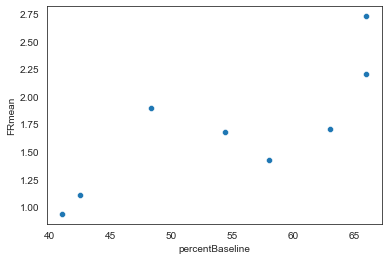

In [104]:
sns.scatterplot(x='percentBaseline',y='FRmean',data=dfr_meta_all[dfr_meta_all.cohort=='CUP'])


<AxesSubplot:xlabel='percentBaseline', ylabel='successRate'>

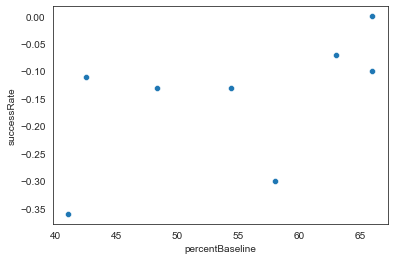

In [105]:
sns.scatterplot(x='percentBaseline',y='successRate',data=dfr_meta_all[dfr_meta_all.cohort=='CUP'])
#sns.scatterplot(x='percentBaseline',y='successRate',data=dfr_meta[dfr_meta.cohort=='CUP'])
#plt.xlabel('percent Gain', fontsize=18)
#plt.ylabel('Percent Loss', fontsize=16)

In [164]:
dfr_meta_all =dfr_meta_all.reset_index()

In [77]:
dfr_meta_all = dfr_meta_all.reset_index()

In [148]:
df_reaches.mouse.unique()

array([ 97, 100, 101, 104,  99, 103,  96, 102], dtype=int64)

In [144]:
dfr_meta_all

,mouse,cohort,FRmean,stds,num_units,gmeanRS,gmeanFS,propPairs,RSRSpairs,RSFSpairs,percentGain,percentLoss,successRate,percentBaseline
0,97,cntrl,1.806985,5.883722,126,1.555827,3.830753,0.022349,0.003302,0.010286,0.000000,0.000000,-0.14,0.000000
1,100,CUP,1.425351,3.259993,76,1.285899,1.606893,0.012281,0.001754,0.004912,10.000000,47.000000,-0.30,58.000000
2,101,CUP,0.937884,3.498815,109,0.646608,2.175533,0.006286,0.002039,0.003228,17.000000,65.000000,-0.36,41.000000
3,104,cntrl,0.671198,1.918753,129,0.598682,0.879222,0.018411,0.003028,0.007267,0.000000,0.000000,-0.12,0.000000
4,99,CUP,2.202005,3.244006,159,2.201593,2.216725,0.018948,0.003583,0.010111,13.000000,41.000000,-0.10,66.000000
5,103,cntrl,1.116917,1.986124,121,1.053957,1.470021,0.010784,0.004342,0.005602,0.000000,0.000000,-0.05,0.000000
6,96,CUP,1.707637,4.290199,127,1.292358,2.982724,0.018748,0.005124,0.006749,3.000000,38.000000,-0.07,63.000000
7,102,CUP,2.726278,2.827101,41,2.390921,5.862724,0.019512,0.009756,0.008537,29.000000,48.000000,0.00,66.000000
1,5454,CUP,1.892004,3.254385,90,1.796711,2.452318,0.000407,0.000122,0.000187,7.284768,58.940397,-0.13,48.344371
2,5480,CUP,1.676029,2.358559,91,1.660278,1.692586,0.000163,0.000065,0.000041,12.621359,58.252427,-0.13,54.368932


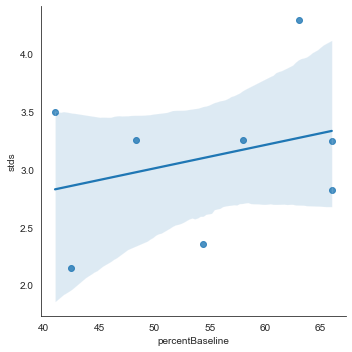

In [46]:
sns.lmplot(x='percentBaseline',y='stds',data=df_meta[df_meta.cohort=='CUP'],order=1)

In [132]:
from scipy import stats

In [42]:
x = df_meta[df_meta.cohort=='CUP'].FRmean
y = df_meta[df_meta.cohort=='CUP'].propPairs

In [43]:
stats.pearsonr(x, y)

(0.5658950471501223, 0.14370999881958613)

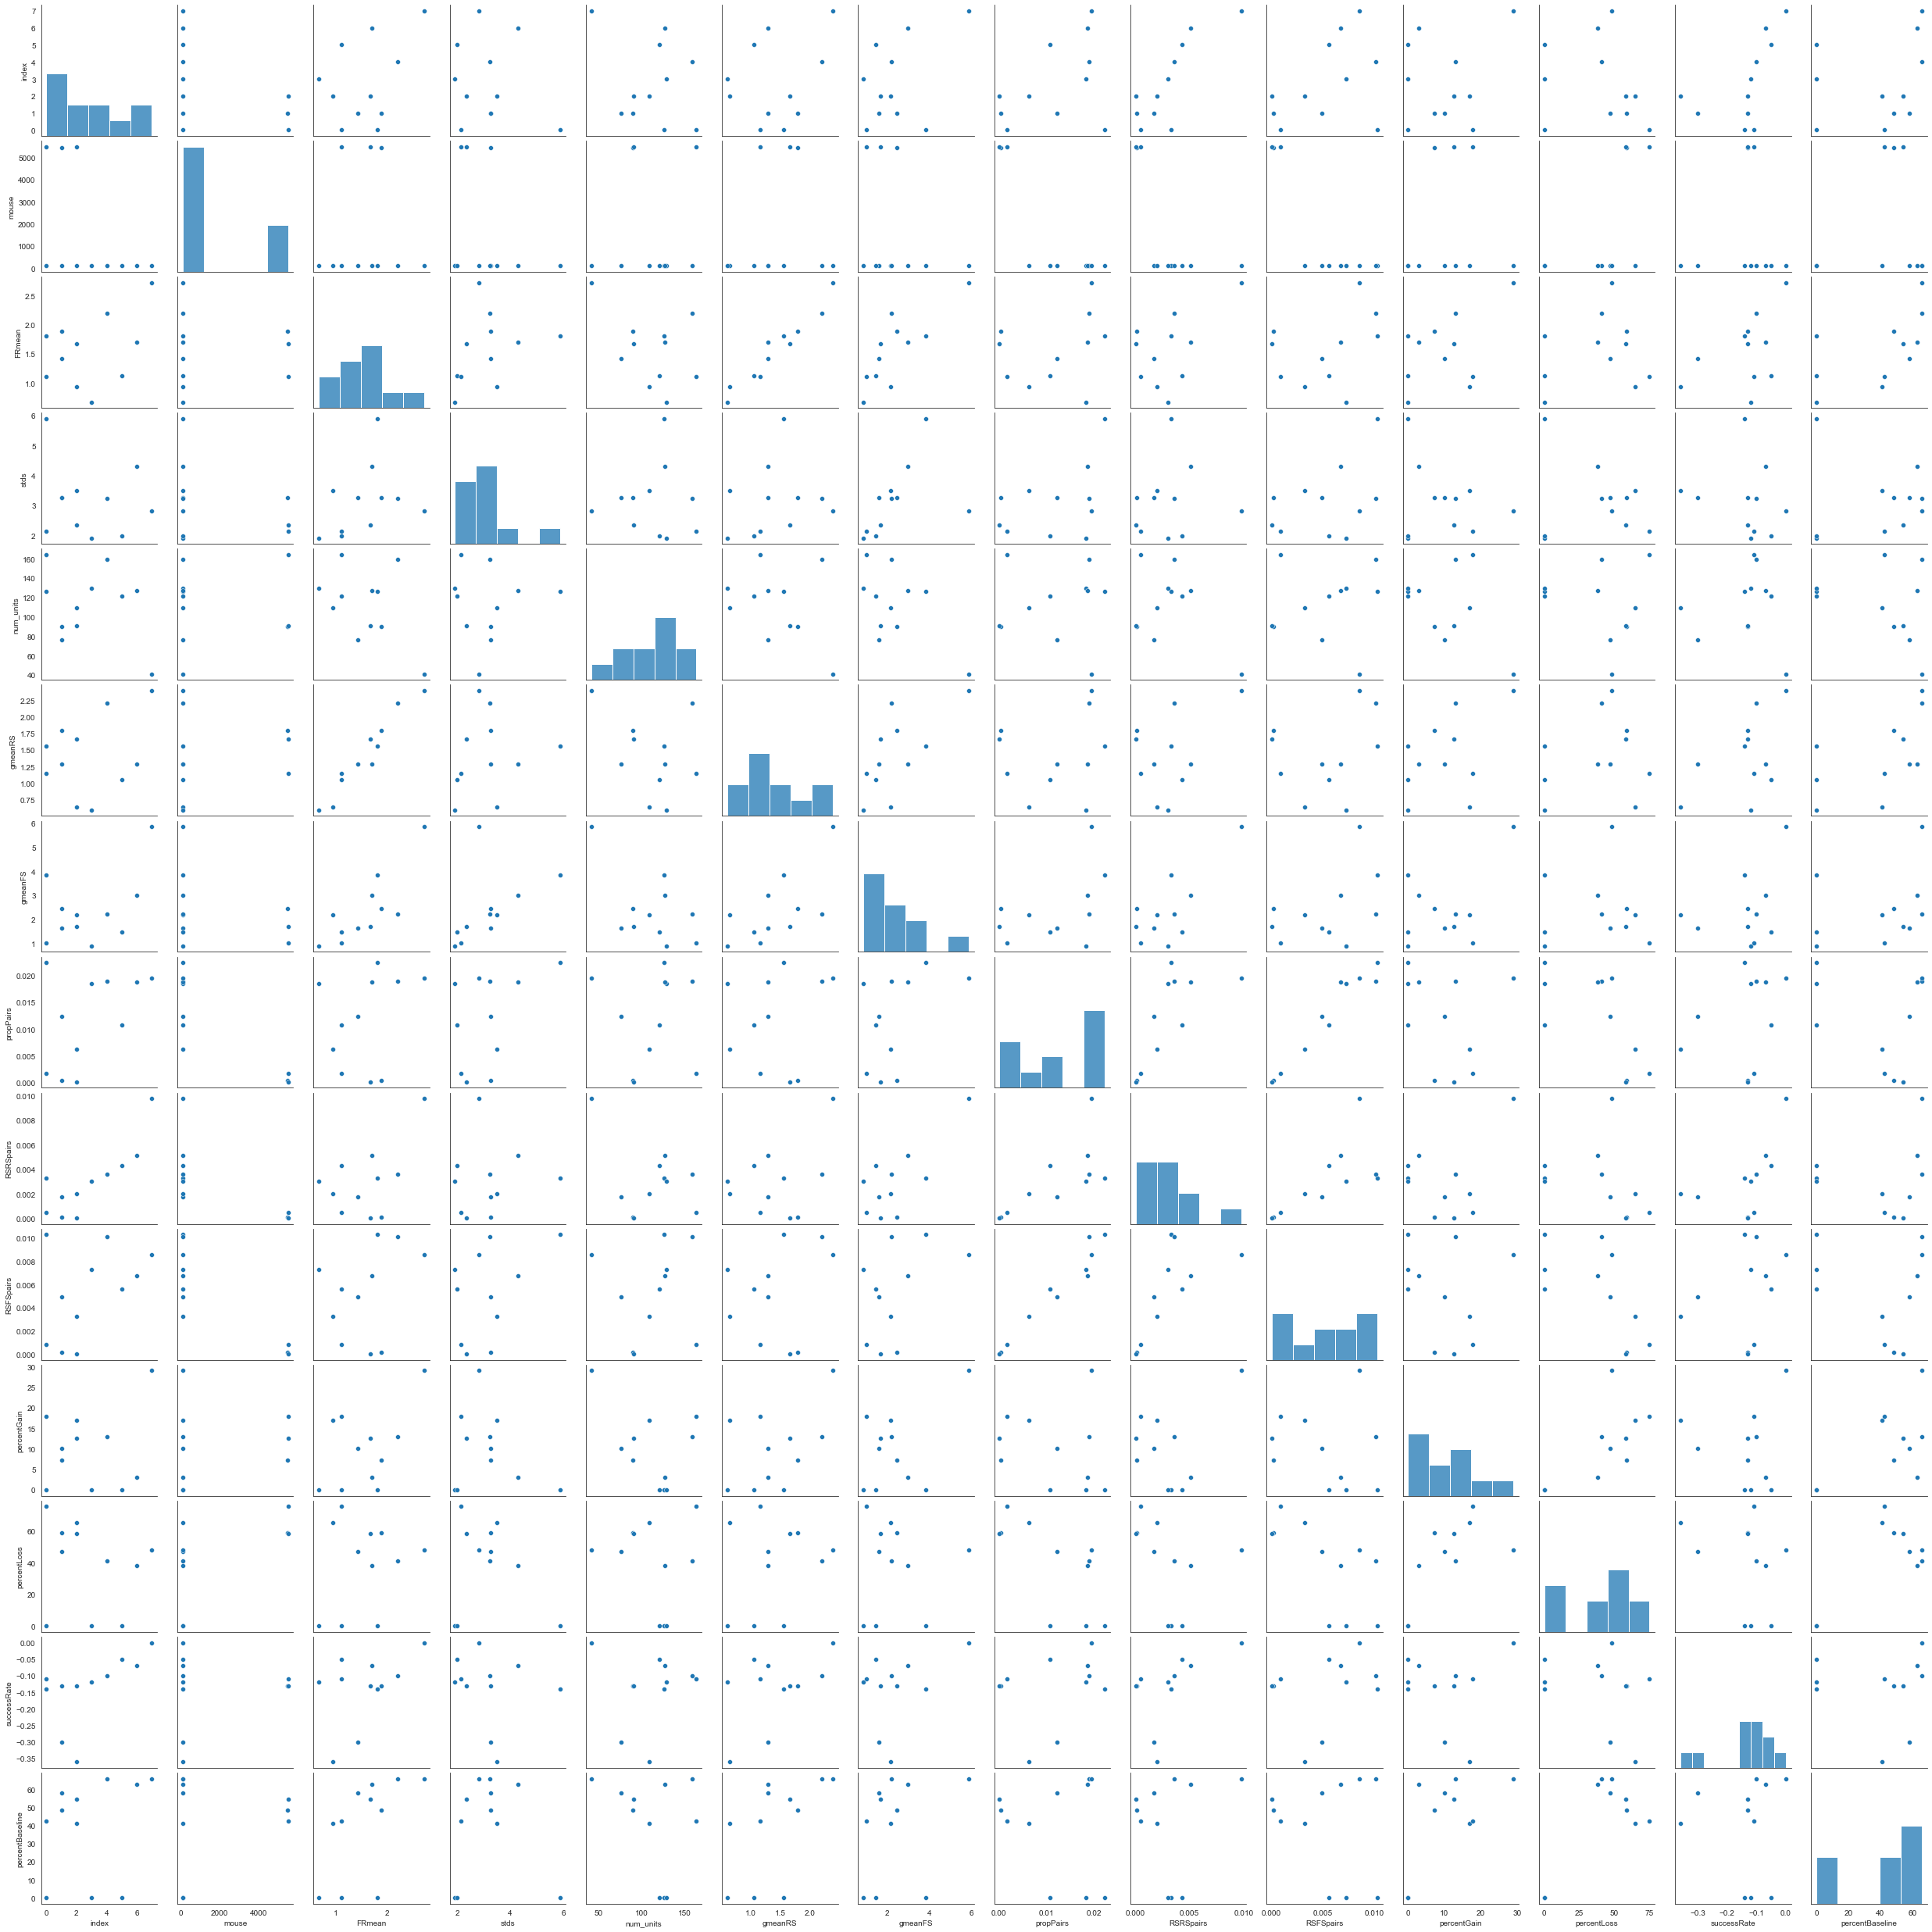

In [131]:
sns.pairplot(data=dfr_meta_all.reset_index())

In [28]:
dfr_meta['avg_train'] =avg_train

In [29]:
dfr_meta['avg_rec'] = avg_rec

In [26]:
avg_train = [0.415,
0.705,
0.475,
0.385,
0.49,
0.605,
0.605,
0.49]

In [27]:
avg_rec = [0.2642428786,
0.4357407407,
0.1116858238,
0.2658227848,
0.3755334282,
0.5563093623,
0.5399515738,
0.5006218905]

In [30]:
import scipy.stats as stats
  
# Performing the paired sample t-test
stats.ttest_rel(avg_train, avg_rec)

Ttest_relResult(statistic=3.2423850753325096, pvalue=0.01420609884402069)

In [31]:
mouse = [97,
100,
101,
104,
99,
103,
96,
102]

In [69]:
dfr_meta

,mouse,cohort,FRmean,stds,num_units,gmeanRS,gmeanFS,propPairs,RSRSpairs,RSFSpairs,percentGain,percentLoss,successRate,percentBaseline
0,97,cntrl,0.000000,8.267675,126,0.000000,3.542129,0.022349,0.003302,0.010286,0,0,-0.14,0.0
1,100,CUP,0.677632,1.875506,76,0.934637,0.655731,0.012281,0.001754,0.004912,10,47,-0.30,58.4
2,101,CUP,1.203574,2.689891,109,0.863465,1.394838,0.006286,0.002039,0.003228,17,65,-0.36,41.0
3,104,cntrl,1.021397,4.418358,129,1.149574,0.858622,0.018411,0.003028,0.007267,0,0,-0.12,0.0
4,99,CUP,2.280072,2.598002,159,2.372040,1.809354,0.018948,0.003583,0.010111,13,41,-0.10,66.0
5,103,cntrl,0.000000,3.924164,120,0.921695,1.050665,0.010784,0.004342,0.005602,0,0,-0.05,0.0
6,96,CUP,1.382048,4.385289,127,1.184631,1.537304,0.018748,0.005124,0.006749,3,38,-0.07,63.0
7,102,CUP,1.655146,2.428239,41,1.955638,2.410993,0.019512,0.009756,0.008537,29,48,0.00,66.0


(0.9634542329765083, 0.008340542868661881)


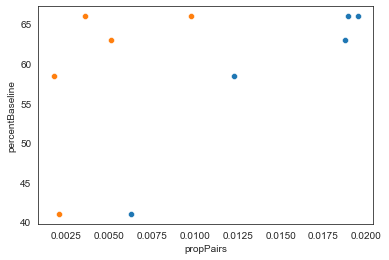

In [101]:
sns.scatterplot(x='propPairs',y='percentBaseline',data=dfr_meta[dfr_meta.cohort=='CUP'])
sns.scatterplot(x='RSRSpairs',y='percentBaseline',data=dfr_meta[dfr_meta.cohort=='CUP'])

print(stats.pearsonr(dfr_meta[dfr_meta.cohort=='CUP'].propPairs, dfr_meta[dfr_meta.cohort=='CUP'].percentBaseline))
#plt.savefig(r'C:\Users\Kim\Documents\conferences\figures\base_srate.svg')

In [11]:
df_meta

,mouse,cohort,FRmean,stds,num_units,gmeanRS,gmeanFS,propPairs,RSRSpairs,RSFSpairs,percentGain,percentLoss,successRate,percentBaseline
0,97,cntrl,1.806985,5.883722,126,1.555827,3.830753,0.022349,0.003302,0.010286,0.000000,0.000000,-0.14,0.000000
1,100,CUP,1.425351,3.259993,76,1.285899,1.606893,0.012281,0.001754,0.004912,10.000000,47.000000,-0.30,58.000000
2,101,CUP,0.937884,3.498815,109,0.646608,2.175533,0.006286,0.002039,0.003228,17.000000,65.000000,-0.36,41.000000
3,104,cntrl,0.671198,1.918753,129,0.598682,0.879222,0.018411,0.003028,0.007267,0.000000,0.000000,-0.12,0.000000
4,99,CUP,2.202005,3.244006,159,2.201593,2.216725,0.018948,0.003583,0.010111,13.000000,41.000000,-0.10,66.000000
5,103,cntrl,1.116917,1.986124,121,1.053957,1.470021,0.010784,0.004342,0.005602,0.000000,0.000000,-0.05,0.000000
6,96,CUP,1.707637,4.290199,127,1.292358,2.982724,0.018748,0.005124,0.006749,3.000000,38.000000,-0.07,63.000000
7,102,CUP,2.726278,2.827101,41,2.390921,5.862724,0.019512,0.009756,0.008537,29.000000,48.000000,0.00,66.000000
8,5454,CUP,1.892004,3.254385,90,1.796711,2.452318,0.000407,0.000122,0.000187,7.284768,58.940397,-0.13,48.344371
9,5480,CUP,1.676029,2.358559,91,1.660278,1.692586,0.000163,0.000065,0.000041,12.621359,58.252427,-0.13,54.368932


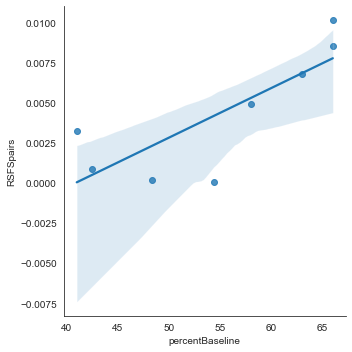

In [15]:
sns.lmplot(x='percentBaseline',y='RSFSpairs',data=df_meta[df_meta.cohort=='CUP'],order=1)
#print(stats.pearsonr(dfr_meta[dfr_meta.cohort=='CUP'].propPairs, dfr_meta[dfr_meta.cohort=='CUP'].percentBaseline))
#plt.savefig(r'C:\Users\Kim\Documents\conferences\figures\rate_propPairs.svg')

In [174]:
df_meta = dfr_meta_all

In [6]:
df_meta = pd.read_csv(r'C:\Users\Kim\Documents\conferences\cosyne\cellpairs_meta.csv')

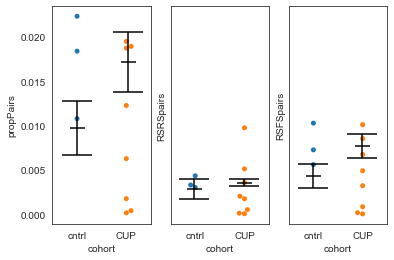

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)

#g1 = sns.swarmplot(x = 'cohort', y = 'propPairs', data=df_meta,hue='FRmean',palette='plasma_r',ax=ax1)
#g2 = sns.swarmplot(x = 'cohort', y = 'RSRSpairs', data=df_meta,hue='FRmean',palette='plasma_r',ax=ax2)
#g3 = sns.swarmplot(x = 'cohort', y = 'RSFSpairs', data=df_meta,hue='FRmean',palette='plasma_r',ax=ax3)

g1 = sns.swarmplot(x = 'cohort', y = 'propPairs', data=df_meta,hue='cohort',ax=ax1)
g2 = sns.swarmplot(x = 'cohort', y = 'RSRSpairs', data=df_meta,hue='cohort',ax=ax2)
g3 = sns.swarmplot(x = 'cohort', y = 'RSFSpairs', data=df_meta,hue='cohort',ax=ax3)

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

sem = list(df_meta.groupby('cohort').propPairs.sem())
mn = list(df_meta.groupby('cohort').propPairs.mean())
x_pos = get_swarm_xpos(ax1)
ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)

sem = list(df_meta.groupby('cohort').RSRSpairs.sem())
mn = list(df_meta.groupby('cohort').RSRSpairs.mean())
x_pos = get_swarm_xpos(ax2)
ax2.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)

sem = list(df_meta.groupby('cohort').RSFSpairs.sem())
mn = list(df_meta.groupby('cohort').RSFSpairs.mean())
x_pos = get_swarm_xpos(ax3)
ax3.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
#plt.ylim(0,110)
plt.savefig(r'C:\Users\Kim\Documents\conferences\cosyne\cellpairs_proportions.svg')

In [33]:
stats.mannwhitneyu(df_meta[df_meta.cohort!='CUP']['RSFSpairs'],df_meta[df_meta.cohort!='cntrl']['RSFSpairs'])


MannwhitneyuResult(statistic=19.0, pvalue=0.19393939393939394)

#### sns.boxplot(x='cohort',y='num_reaches',data=dfr_meta)
sns.swarmplot(x='cohort',y='num_reaches',data=dfr_meta,color='black')

In [358]:
from scipy import stats

In [360]:
x = dfr_meta[dfr_meta.cohort=='CUP'].num_units
y = dfr_meta[dfr_meta.cohort=='CUP'].FRmean
stats.pearsonr(x, y)

(-0.5502006511850573, 0.05138657687124258)

In [102]:
dfr_meta

,mouse,cohort,FRmean,stds,num_units,gmeanRS,gmeanFS,gmeanRS_epoch,gmeanFS_epoch,propPairs,RSRSpairs,RSFSpairs,percentGain,percentLoss,successRate,percentBaseline,avg_train
0,97,cntrl,1.806985,5.883722,126,1.555827,3.830753,1.705080,4.569866,0.022349,0.003302,0.010286,0,0,-0.14,0,0.415
1,100,CUP,1.425351,3.259993,76,1.285899,1.606893,1.552895,1.940867,0.012281,0.001754,0.004912,10,47,-0.30,58,0.705
2,101,CUP,0.937884,3.498815,109,0.646608,2.175533,0.686283,3.174609,0.006286,0.002039,0.003228,17,65,-0.36,41,0.475
3,104,cntrl,0.671198,1.918753,129,0.598682,0.879222,0.666883,1.078535,0.018411,0.003028,0.007267,0,0,-0.12,0,0.385
4,99,CUP,2.202005,3.244006,159,2.201593,2.216725,2.136627,2.221128,0.018948,0.003583,0.010111,13,41,-0.10,66,0.490
5,103,cntrl,1.116917,1.986124,121,1.053957,1.470021,1.078311,1.478848,0.010784,0.004342,0.005602,0,0,-0.05,0,0.605
6,96,CUP,1.707637,4.290199,127,1.292358,2.982724,1.499318,3.942266,0.018748,0.005124,0.006749,3,38,-0.07,63,0.605
7,102,CUP,2.726278,2.827101,41,2.390921,5.862724,2.667688,6.592551,0.019512,0.009756,0.008537,29,48,0.00,66,0.490


<AxesSubplot:xlabel='gmeanFS', ylabel='propPairs'>

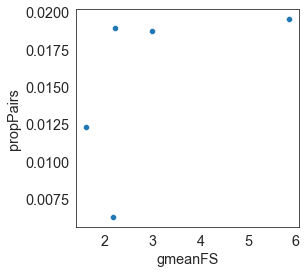

In [106]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='gmeanFS',y='propPairs',data=dfr_meta[dfr_meta.cohort=='CUP'])
#plt.savefig(r'C:\Users\Kim\Documents\conferences\figures\fr_baselineOL.svg')

<AxesSubplot:xlabel='gmeanRS_epoch', ylabel='percentBaseline'>

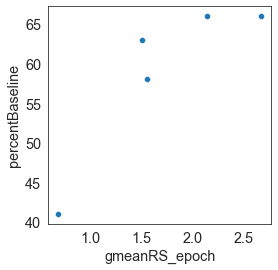

In [107]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='gmeanRS_epoch',y='percentBaseline',data=dfr_meta[dfr_meta.cohort=='CUP'])
#plt.savefig(r'C:\Users\Kim\Documents\conferences\figures\fr_baselineOL.svg')

<AxesSubplot:xlabel='propPairs', ylabel='percentBaseline'>

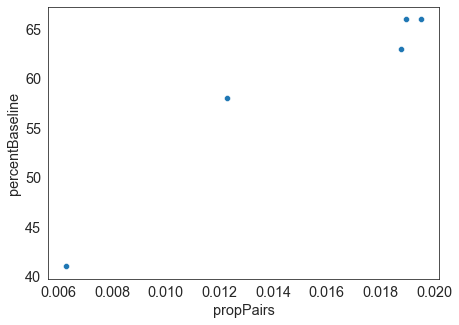

In [90]:
sns.scatterplot(x='propPairs',y='percentBaseline',data=dfr_meta[dfr_meta.cohort=='CUP'])


In [81]:
avg_train = [0.415,
0.705,
0.475,
0.385,
0.49,
0.605,
0.605,
0.49]
dfr_meta['avg_train'] = avg_train

<AxesSubplot:xlabel='avg_train', ylabel='successRate'>

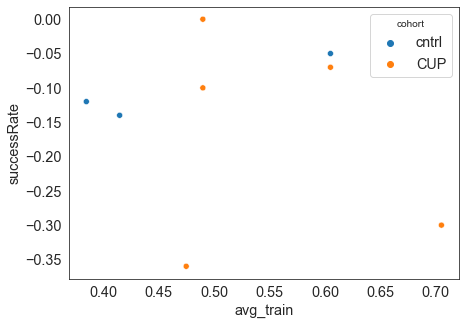

In [83]:
sns.scatterplot(x='avg_train',y='successRate',data=dfr_meta,hue='cohort')

<AxesSubplot:xlabel='successRate', ylabel='percentBaseline'>

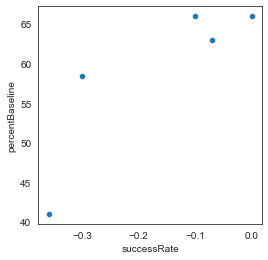

In [44]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='successRate',y='percentBaseline',data=dfr_meta[dfr_meta.cohort=='CUP'])

In [15]:
df_test = df[df.group=='good'][df.log_rate>0]

In [33]:
df['epoch_lograte'] = np.log(df.epochFR)

In [38]:
df_run = df[df.mod_up=='no']

<AxesSubplot:xlabel='mouse', ylabel='epoch_lograte'>

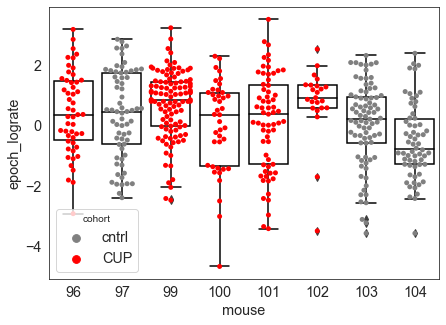

In [39]:
sns.swarmplot(x='mouse',y='epoch_lograte',data=df_run,hue='cohort',size=5,palette=['gray','red'])
sns.boxplot(x='mouse',y='epoch_lograte',data=df_run,**PROPS)

<AxesSubplot:xlabel='mouse', ylabel='epoch_lograte'>

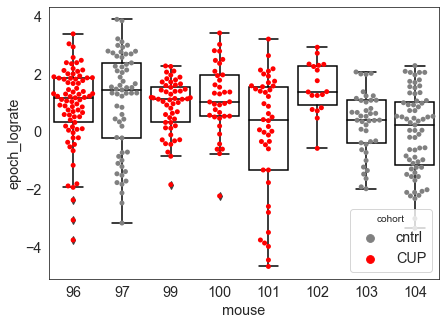

In [37]:
sns.swarmplot(x='mouse',y='epoch_lograte',data=df_run,hue='cohort',size=5,palette=['gray','red'])
sns.boxplot(x='mouse',y='epoch_lograte',data=df_run,**PROPS)

In [32]:
sns.swarmplot(x='mouse',y='epoch_lograte',data=df_run,hue='cohort',size=5,palette=['gray','red'])
sns.boxplot(x='mouse',y='epoch_lograte',data=df_run,**PROPS)



NameError: name 'df_run' is not defined

In [14]:
df['log_rate'] = np.log(df.overall_rate)

<AxesSubplot:xlabel='mouse', ylabel='log_rate'>

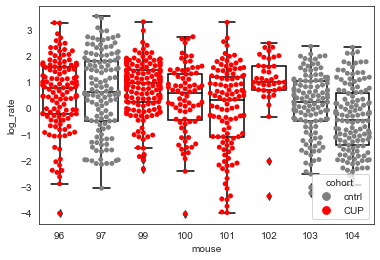

In [16]:
sns.swarmplot(x='mouse',y='log_rate',data=df,hue='cohort',size=5,palette=['gray','red'])
sns.boxplot(x='mouse',y='log_rate',data=df,**PROPS)

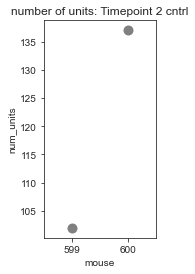

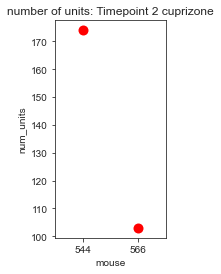

In [293]:
plt.figure(figsize=(2,4))
sns.swarmplot(x='mouse',y='num_units',data=dfr_meta[dfr_meta.timepoint==2][dfr_meta.cohort=='cntrl'],size=10,color='gray')
plt.title('number of units: Timepoint 2 cntrl')
plt.show()
plt.close()
plt.figure(figsize=(2,4))
sns.swarmplot(x='mouse',y='num_units',data=dfr_meta[dfr_meta.timepoint==2][dfr_meta.cohort=='CUP'],size=10,color='red')
plt.title('number of units: Timepoint 2 cuprizone')
plt.show()
plt.close()

In [90]:
df['log_rate'] = np.log(df.overall_rate)

In [7]:
sns.swarmplot(x='cohort',y='log_rate',data=dfs,palette=['gray','red'])

NameError: name 'dfs' is not defined

(0.0, 4.0)

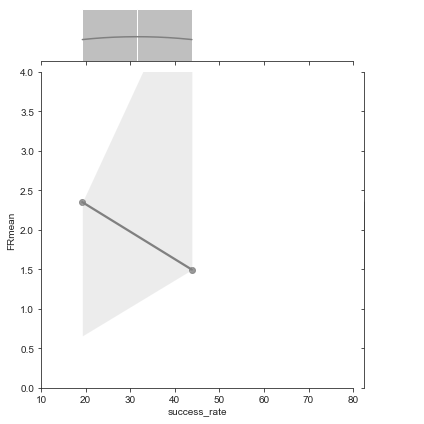

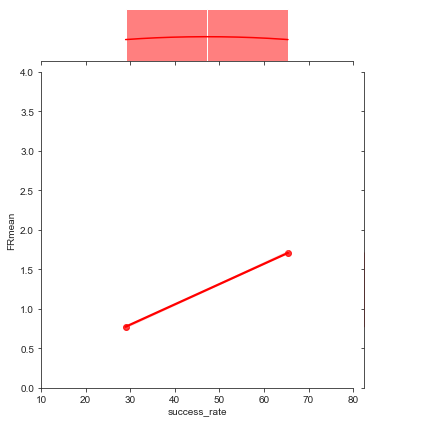

In [383]:
sns.jointplot(x='success_rate',y='FRmean',data=dfr_meta[20:][dfr_meta.timepoint==2][dfr_meta.cohort=='cntrl'],color='gray',kind='reg',xlim=(10,80))
plt.xlim(0,500)
plt.ylim(0,4)
sns.jointplot(x='success_rate',y='FRmean',data=dfr_meta[20:][dfr_meta.timepoint==2][dfr_meta.cohort=='CUP'],color='red',kind='reg',xlim=(10,80))
plt.xlim(0,600)
plt.ylim(0,4)

<AxesSubplot:xlabel='cohort', ylabel='num_reaches'>

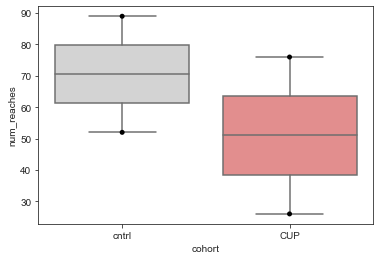

In [378]:
order = ['cntrl','CUP']
sns.boxplot(x='cohort',y='num_reaches',data=dfr_meta[20:][dfr_meta.timepoint==2],order=order,palette=['lightgray','lightcoral'])
sns.swarmplot(x='cohort',y='num_reaches',data=dfr_meta[20:][dfr_meta.timepoint==2]
              ,color='black',order=order)

In [240]:
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")

sns.jointplot(x='num_reaches',y='success_rate',data=dfr_meta_sns.jointplot(x='stds',y='success_rate',data=dfr_meta_[dfr_meta_.cohort=='cntrl'][dfr_meta.mouse!=65],kind='reg')[dfr_meta.mouse!=65],kind='reg')
sns.jointplot(x='stds',y='success_rate',data=dfr_meta_[dfr_meta_.cohort=='cntrl'][dfr_meta.mouse!=65],kind='reg')

NameError: name 'dfr_meta_sns' is not defined

<AxesSubplot:xlabel='success_rate', ylabel='num_reaches'>

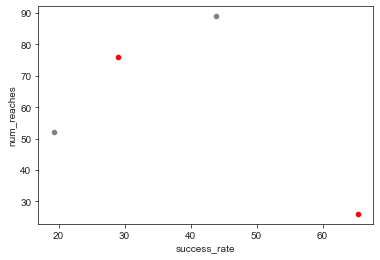

In [241]:
sns.scatterplot(x='success_rate',
                y='num_reaches',data=dfr_meta[dfr_meta.cohort=='cntrl'][dfr_meta.timepoint==2],color='gray')
#lt.xlim(1,2.5)
#lt.ylim(0,120)
sns.scatterplot(x='success_rate',y='num_reaches',data=dfr_meta[dfr_meta.cohort=='CUP'][dfr_meta.timepoint==2],color='red')
#lt.xlim(1,2.5)
#lt.ylim(0,120)


In [246]:
np.shape(df_reaches[df_reaches.mouse==566])

(26, 8)

In [343]:
df[df.timepoint==2].mouse.unique()

array([ 19,  20,  22,  24,  49,  53,  56,  58,  59,  63,  66,  69, 544,
       566, 599, 600], dtype=int64)

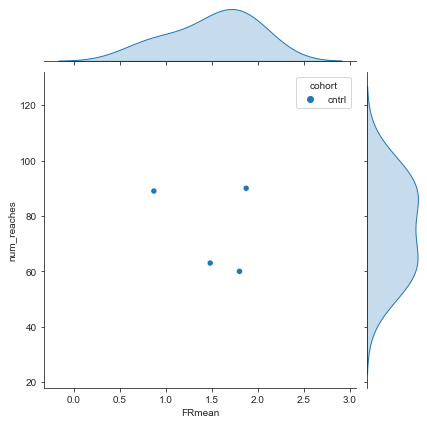

In [221]:
sns.jointplot(x='FRmean',
                y='num_reaches',data=dfr_meta[dfr_meta.cohort=='cntrl'][dfr_meta.timepoint==2],hue='cohort',color='gray',kind='reg')
plt.xlim(1,2.5)
plt.ylim(0,120)
#sns.jointplot(x='FRmean',y='num_reaches',data=dfr_meta[dfr_meta.cohort=='CUP'][dfr_meta.timepoint==2],color='red',kind='reg')
#plt.xlim(1,2.5)
#plt.ylim(0,120)


In [139]:
dfr_meta_

,mouse,cohort,success_rate,timepoint,gmean_rate,stds
2,22,CUP,0.285714,2,2.425617,5.290411
3,24,CUP,0.291667,2,1.738546,5.833040
4,19,CUP,0.200000,2,1.510901,5.726632
5,20,CUP,0.545455,2,1.450270,3.816238
12,59,cntrl,0.325843,2,0.860893,2.434891
13,58,cntrl,0.365079,2,1.480548,5.057403
14,49,cntrl,0.644444,2,1.871399,5.107554
15,53,CUP,0.310345,2,1.495236,2.663480
16,56,cntrl,0.516667,2,1.798999,4.605382
17,63,CUP,0.317073,2,1.397022,5.707407


<AxesSubplot:xlabel='cohort', ylabel='gmean_rate'>

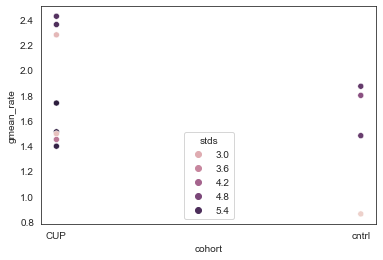

In [144]:
sns.scatterplot(x='cohort',y='gmean_rate',data=dfr_meta_,hue='stds')

<AxesSubplot:xlabel='cohort', ylabel='gmean_rate'>

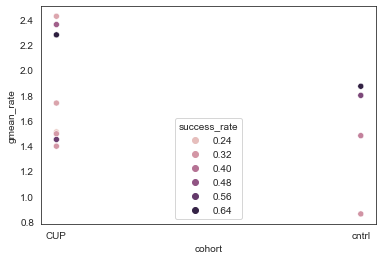

In [145]:
sns.scatterplot(x='cohort',y='gmean_rate',data=dfr_meta_,hue='success_rate')

In [76]:
from scipy import stats

In [78]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfr_meta[dfr_meta.cohort=='cntrl'][dfr_meta.mouse!=65].gmean_rate,y=dfr_meta[dfr_meta.cohort=='cntrl'][dfr_meta.mouse!=65].success_rate)

In [9]:
def swarmit_beh(df_run,path):
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['success_rate'],df_run[df_run.cohort!='cntrl']['success_rate'])
    sem = list(df_run.groupby('cohort').success_rate.sem())
    mn = list(df_run.groupby('cohort').success_rate.mean())
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,8))
    sns.swarmplot(x='cohort',y='success_rate',data=df_run,size=5,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    x_pos = get_swarm_xpos(ax)
    ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    #ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    ax.set_ylim(0,100)
    plt.show()
    fig.savefig(str(path))
    plt.close()

In [405]:
dfr_meta_ = dfr_meta[dfr_meta.timepoint=='3']

In [406]:
dfr_meta_

,mouse,cohort,success_rate,timepoint,gmean_rate,stds
6,64,CUP,52.173913,3,2.398850,5.125648
7,65,cntrl,17.647059,3,1.544333,2.219625
9,68,CUP,34.722222,3,1.891342,2.317827


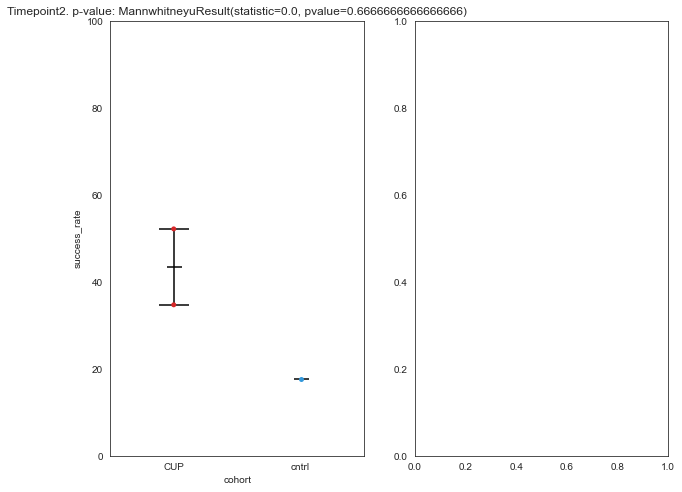

In [407]:
swarmit_beh(dfr_meta_,path=r'C:\Users\Kim\Documents\Data\daileydata\GRCmyelinFigs\behavior\'TP3.svg')

In [62]:
from scipy.stats import gmean

In [ ]:
for i in df[df_.mouse.unique()

# Movement-related

In [ ]:
g2 = sns.boxplot(x=np.log(df_up.epochFR, out=np.zeros_like(df_up.epochFR), where=(df_up.epochFR!=0)),y=df_up.cohort,palette=dict(CUP="#d62728", cntrl="#3498db"))


In [7]:
def swarmit_MoveMod(df_run,path):
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['epochFR'],df_run[df_run.cohort!='cntrl']['epochFR'])
    sem = list(df_run.groupby('cohort').epochFR.sem())
    mn = list(df_run.groupby('cohort').epochFR.mean())
    
    fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,8))
    sns.swarmplot(x='epochFR',y='cohort',data=df_run,size=15,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    x_pos = get_swarm_xpos(ax)
    ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    #ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    #ax.set_ylim(0,.70)
    plt.show()
    fig.savefig(str(path))
    plt.close()

In [36]:
    PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}

In [8]:
def swarmit_peakUp(df_run,path):
    PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}
    pval =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['peakup'],df_run[df_run.cohort!='cntrl']['peakup'])
    sem = list(df_run.groupby('cohort').peakup.sem())
    mn = list(df_run.groupby('cohort').peakup.mean())
    
    fig, (ax) = plt.subplots(1,figsize = (10,8))
    sns.swarmplot(x='peakup',y='cohort',data=df_run,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"))
    sns.boxplot(x='peakup',y='cohort',data=df_run,ax=ax,palette=dict(CUP="#d62728", cntrl="#3498db"),**PROPS)
    #x_pos = get_swarm_xpos(ax)
    #ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
    #ax1.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
                #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5)
    ax.set_title('Timepoint2. p-value: ' + str(pval))
    #ax.set_ylim(0,.70)
    plt.show()
    fig.savefig(str(path))
    plt.close()

In [268]:
df_reaches = dfr_new

In [11]:
df_reaches= dfr_first20min

In [12]:
dfr = df_reaches[df_reaches.mouse!=22][df_reaches.mouse!=24][df_reaches.mouse!=63][df_reaches.mouse!=49]
df_run = df[df.mouse!=63][df.mouse!=22][df.mouse!=24]

In [13]:
dfs = [analysis.movement_mod(df_run[df_run.mouse==mouseid],dfr[dfr.mouse==mouseid]) for i,mouseid in enumerate(dfr.mouse.unique())]
df_ = pd.concat(dfs,ignore_index=True)

[42]
[47]
[51]
[53]
[56]
[58]
[64]
[65]
[66]
[68]
[69]
[11]
[20]
[59]
[19]


In [14]:
df_.to_json(r'C:\Users\Kim\Documents\Data\daileydata\GRCmyelinFigs\POSTER\df_aligned_first20min.json')

In [85]:
df_up = df[df.mod_up=='yes']

In [86]:
def plotDistrib(df,path,save=False):
    fig,(ax,ax1) = plt.subplots(2)
    g1 = sns.distplot(df[df.cohort=='CUP'].epochFR, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="#d62728",ax=ax)
    g1 = sns.distplot(df[df.cohort=='cntrl'].epochFR, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="#3498db",ax=ax)
    ax.set_title('TimePoint1 (blue:control, red: cuprizone)')
    g2 = sns.boxplot(x='epochFR',y='cohort',data=df,palette=dict(CUP="#d62728", cntrl="#3498db"))
    if save==True:
        fig.savefig(path)

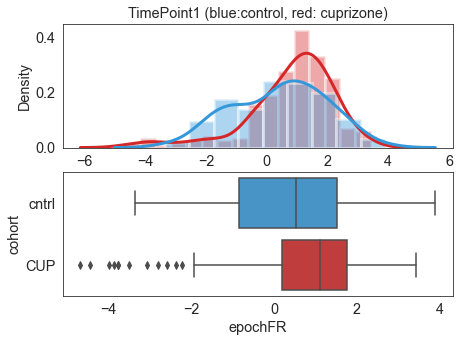

In [87]:
#path = r'Z:\BIOElectricsLab\Dailey\NPX_animalsummary_kim_04_2022\FiringRates\TimePoint2\MovementMod\distribution_log.png'

fig,(ax,ax1) = plt.subplots(2)
g1 = sns.distplot(np.log(df_up[df_up.cohort=='CUP'].epochFR,out=np.zeros_like(df_up[df_up.cohort=='CUP'].epochFR), where=(df_up[df_up.cohort=='CUP'].epochFR!=0)), hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="#d62728",ax=ax)
g1 = sns.distplot(np.log(df_up[df_up.cohort=='cntrl'].epochFR,out=np.zeros_like(df_up[df_up.cohort=='cntrl'].epochFR), where=(df_up[df_up.cohort=='cntrl'].epochFR!=0)), hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="#3498db",ax=ax)
ax.set_title('TimePoint1 (blue:control, red: cuprizone)')
g2 = sns.boxplot(x=np.log(df_up.epochFR, out=np.zeros_like(df_up.epochFR), where=(df_up.epochFR!=0)),y=df_up.cohort,palette=dict(CUP="#d62728", cntrl="#3498db"))
#fig.savefig(path)

<AxesSubplot:xlabel='cohort', ylabel='epochFR'>

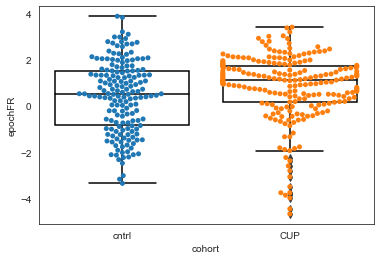

In [32]:
sns.boxplot(x=df_up.cohort,y=np.log(df_up.epochFR),**PROPS)
sns.swarmplot(x=df_up.cohort,y=np.log(df_up.epochFR))

(0.0, 30.0)

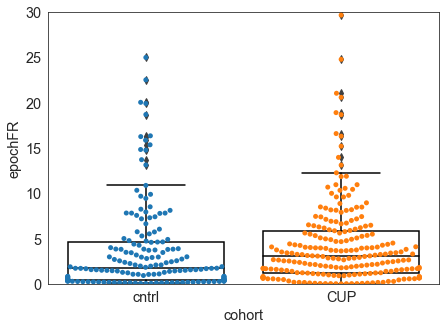

In [98]:
sns.boxplot(x=df_up.cohort,y=df_up.epochFR,**PROPS)
sns.swarmplot(x=df_up.cohort,y=df_up.epochFR)
plt.ylim(0,30)

In [ ]:
sns.boxplot(x=df_up[df_up.waveform_class=='fs'].peakup,y=df_up.cohort,**PROPS)
#sns.swarmplot(x=df_up[df_up.waveform_class=='fs'].peakup,y=df_up.cohort,palette=dict(CUP="#d62728", cntrl="#3498db"))
sns.swarmplot(x=df_up[df_up.waveform_class=='fs'].peakup,y=df_up.cohort,hue=df_up[df_up.waveform_class=='fs'].mouse)

In [ ]:
sns.boxplot(x=df_up[df_up.layer=='L5'][df_up.waveform_class=='rs'][df_up.mod_up=='yes'].peakup,y=df_up.cohort,**PROPS)
sns.swarmplot(x=df_up[df_up.layer=='L5'][df_up.waveform_class=='rs'][df_up.mod_up=='yes'].peakup,y=df_up.cohort,palette=dict(CUP="#d62728", cntrl="#3498db"))
#fig.savefig(path)

In [16]:
df_run = df_up[df_up.waveform_class=='rs']

In [17]:
df_run.mouse.unique()

array([ 97, 100, 101, 104,  99, 103,  96, 102], dtype=int64)

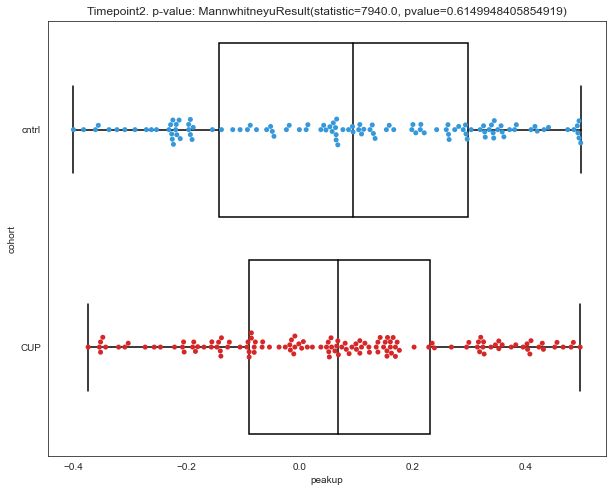

In [18]:
swarmit_peakUp(df_run,path=r'C:\Users\Kim\Documents\Data\daileydata\GRCmyelinFigs\behavior\MoveMod\TP_L5fs.svg')

# compare dailey and gustavo

(0.0, 20.0)

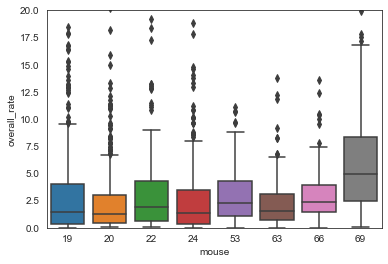

In [166]:
sns.boxplot(x='mouse',y='overall_rate',data=df_d[df_d.timepoint=='2'][df_d.cohort=='CUP'])
plt.ylim(0,20)

In [185]:
df_all = df_all.drop('level_0',axis=1)
df_all = df_all.reset_index()

<AxesSubplot:xlabel='mouse', ylabel='overall_rate'>

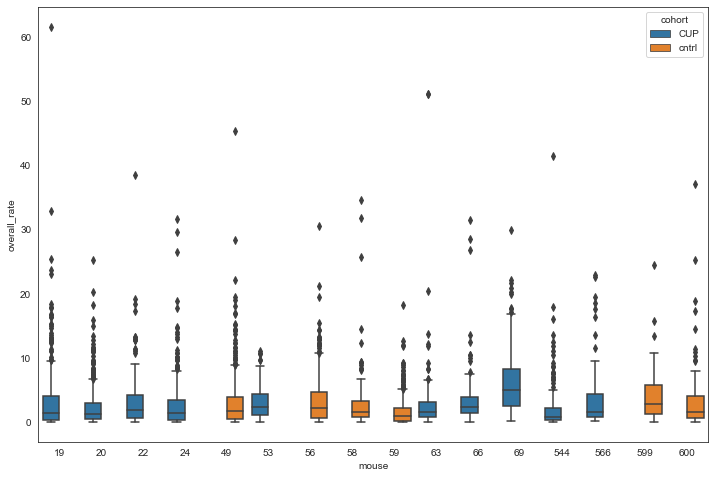

In [191]:
plt.figure(figsize=(12,8))
sns.boxplot(x='mouse',y='overall_rate',data=df_all[df_all.timepoint=='2'],hue='cohort')

(0.0, 20.0)

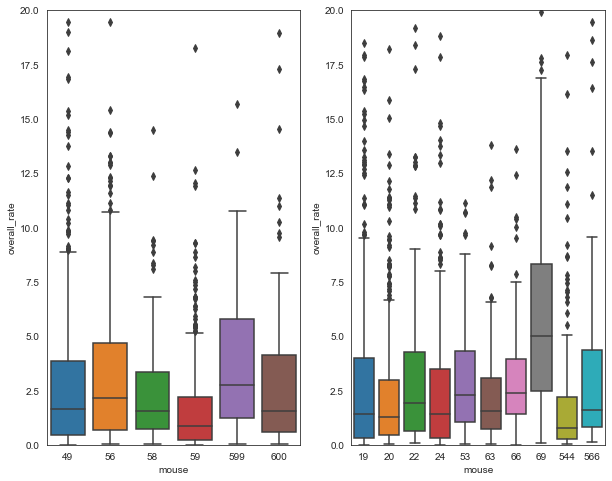

In [194]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
g1 = sns.boxplot(x='mouse',y='overall_rate',data=df_all[df_all.timepoint=='2'][df_all.cohort=='cntrl'],ax=ax1)
g2 = sns.boxplot(x='mouse',y='overall_rate',data=df_all[df_all.timepoint=='2'][df_all.cohort=='CUP'],ax=ax2)
ax1.set_ylim(0,20)
ax2.set_ylim(0,20)

In [14]:
df.cohort.unique()

array(['CUP', 'cntrl'], dtype=object)

In [15]:
df_cntrl = df[df.timepoint==2][df.cohort=='cntrl']
df_cup = df[df.timepoint==2][df.cohort=='CUP']

In [19]:
df_test = df[df.timepoint==2]

<AxesSubplot:xlabel='mouse', ylabel='overall_rate'>

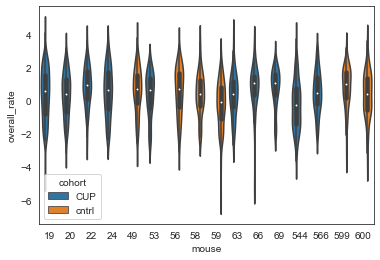

In [22]:
sns.violinplot(x=df_test.mouse,y=np.log(df_test.overall_rate),hue=df_test.cohort)


In [7]:
df['log_rate'] = np.log(df.overall_rate)

In [9]:
df[df.timepoint==2].mouse.unique()

array([ 19,  20,  22,  24,  49,  53,  56,  58,  59,  63,  66,  69, 544,
       566, 599, 600], dtype=int64)

<AxesSubplot:>

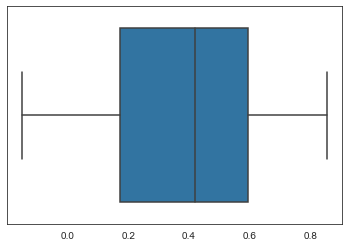

In [31]:
sns.boxplot(list(df[df.cohort=='cntrl'].groupby('mouse').log_rate.mean()))

<AxesSubplot:>

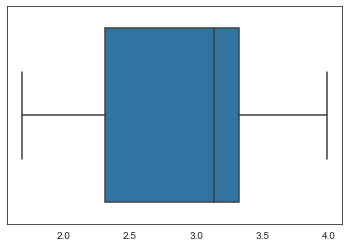

In [33]:
sns.boxplot(list(df[df.cohort=='cntrl'].groupby('mouse').overall_rate.mean()))

In [84]:
df['log_rate'] = np.log(df.overall_rate)

In [94]:
df = df[df.group=='good']

In [95]:
df_G = df[df.timepoint==2][df.cohort2=='Gustavo']
df_D = df[df.timepoint==2][df.cohort2=='Dailey']

Text(0.5, 1.0, 'Dailey Control')

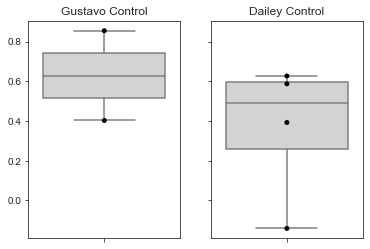

In [96]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
g1 = sns.boxplot(y=list(df_G[df_G.cohort=='cntrl'].groupby('mouse').log_rate.mean()),color='lightgray',ax=ax1)
g1 = sns.swarmplot(y=list(df_G[df_G.cohort=='cntrl'].groupby('mouse').log_rate.mean()),color='black',ax=ax1)
g2 = sns.boxplot(y=list(df_D[df_D.cohort=='cntrl'].groupby('mouse').log_rate.mean()),color='lightgray',ax=ax2)
g2 = sns.swarmplot(y=list(df_D[df_D.cohort=='cntrl'].groupby('mouse').log_rate.mean()),color='black',ax=ax2)
ax1.set_title('Gustavo Control')
ax2.set_title('Dailey Control')

In [168]:
df_DG['log_rate'] = np.log(df_DG.overall_rate)

In [169]:
df_D = df_DG[df_DG.group=='good'][df_DG.timepoint==2][df_DG.cohort2=='Dailey']
df_G = df_DG[df_DG.group=='good'][df_DG.timepoint==2][df_DG.cohort2=='Gustavo']

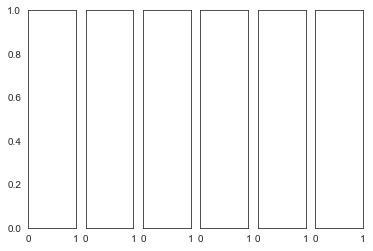

In [181]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,sharey=True)


Text(0.5, 1.0, 'Kim cuprizone')

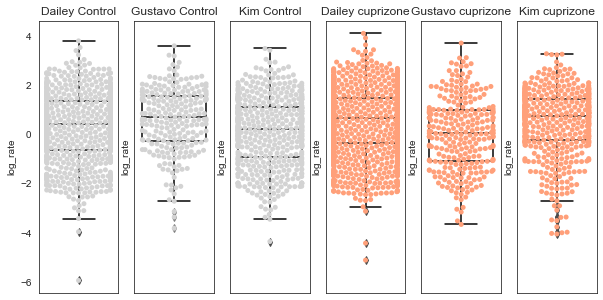

In [192]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,sharey=True,figsize=(10,5))
g1 = sns.boxplot(y=df_D[df_D.cohort=='cntrl'].log_rate,color='red',ax=ax1,**PROPS)
g1 = sns.swarmplot(y=df_D[df_D.cohort=='cntrl'].log_rate,color='lightgray',ax=ax1)

g2 = sns.boxplot(y=df_G[df_G.cohort=='cntrl'].log_rate,color='lightgray',ax=ax2,**PROPS)
g2 = sns.swarmplot(y=df_G[df_G.cohort=='cntrl'].log_rate,color='lightgray',ax=ax2)

g3 = sns.boxplot(y=df[df.cohort=='cntrl'].log_rate,color='blue',ax=ax3,**PROPS)
g3 = sns.swarmplot(y=df[df.cohort=='cntrl'].log_rate,color='lightgray',ax=ax3)

g4 = sns.boxplot(y=df_D[df_D.cohort=='CUP'].log_rate,color='red',ax=ax4,**PROPS)
g4 = sns.swarmplot(y=df_D[df_D.cohort=='CUP'].log_rate,color='lightsalmon',ax=ax4)

g5 = sns.boxplot(y=df_G[df_G.cohort=='CUP'].log_rate,color='lightgray',ax=ax5,**PROPS)
g5 = sns.swarmplot(y=df_G[df_G.cohort=='CUP'].log_rate,color='lightsalmon',ax=ax5)

g6 = sns.boxplot(y=df[df.group=='good'][df.cohort=='CUP'].log_rate,color='blue',ax=ax6,**PROPS)
g6 = sns.swarmplot(y=df[df.group=='good'][df.cohort=='CUP'].log_rate,color='lightsalmon',ax=ax6)

ax1.set_title('Dailey Control')
ax2.set_title('Gustavo Control')
ax3.set_title('Kim Control')

ax4.set_title('Dailey cuprizone')
ax5.set_title('Gustavo cuprizone')
ax6.set_title('Kim cuprizone')

Text(0.5, 1.0, 'Dailey Control')

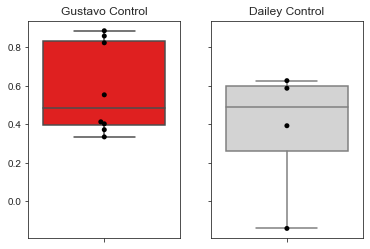

In [99]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
g1 = sns.boxplot(y=list(df_D[df_D.cohort=='CUP'].groupby('mouse').log_rate.mean()),color='red',ax=ax1)
g1 = sns.swarmplot(y=list(df_D[df_D.cohort=='CUP'].groupby('mouse').log_rate.mean()),color='black',ax=ax1)
g2 = sns.boxplot(y=list(df_D[df_D.cohort=='cntrl'].groupby('mouse').log_rate.mean()),color='lightgray',ax=ax2)
g2 = sns.swarmplot(y=list(df_D[df_D.cohort=='cntrl'].groupby('mouse').log_rate.mean()),color='black',ax=ax2)
ax1.set_title('Gustavo Control')
ax2.set_title('Dailey Control')

In [100]:
df_D[df_D.cohort=='cntrl'].groupby('mouse').log_rate.mean()

mouse
49    0.626686
56    0.587231
58    0.392412
59   -0.141333
Name: log_rate, dtype: float64

In [185]:
df = df_test[df_test.cohort2=="Gustavo"][df_test.layer=='L5'][df_test.waveform_class=='rs']

In [253]:
df_[df_.cohort=='CUP'][df_.timepoint==2].groupby('mouse').log_rate.mean()

mouse
19    0.412706
20    0.371750
22    0.886086
24    0.553049
53    0.402284
63    0.334343
66    0.858666
69    0.823474
Name: log_rate, dtype: float64

In [187]:
df[df.cohort=='cntrl'][df.timepoint==2].groupby('mouse').log_rate.mean()

mouse
599    0.786827
600    0.402175
Name: log_rate, dtype: float64

<AxesSubplot:xlabel='mouse', ylabel='log_rate'>

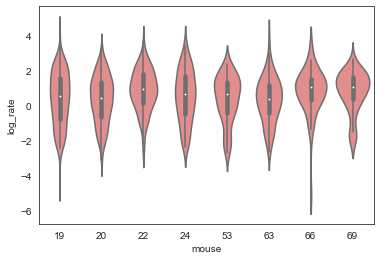

In [251]:
sns.violinplot(x='mouse',y='log_rate',data=df_[df_.cohort=='CUP'],color='lightcoral')
sns.violinplot(x='mouse',y='log_rate',data=df[df.cohort=='CUP'],color='lightcoral')

#sns.scatterplot(x='mouse',y='log_rate',data=df[df.cohort=='cntrl'],color='lightgray')

Text(0.5, 1.0, 'Gustavo cuprizone')

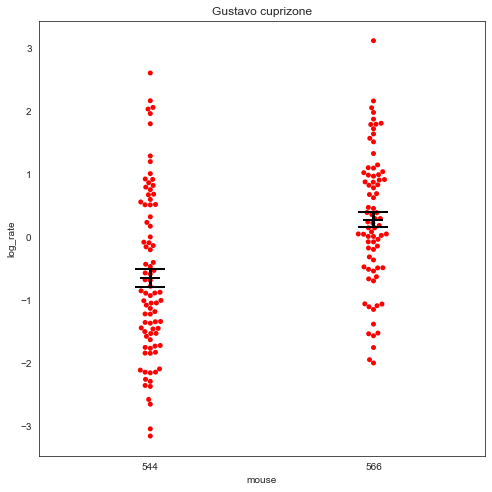

In [188]:
mn = list(df[df.cohort=='CUP'][df.timepoint==2].groupby('mouse').log_rate.mean())
sem = list(df[df.cohort=='CUP'][df.timepoint==2].groupby('mouse').log_rate.sem())

fig, (ax) = plt.subplots(1,figsize = (8,8))
sns.swarmplot(x='mouse',y='log_rate',data=df[df.cohort=='CUP'][df.timepoint==2],color='red',ax=ax,zorder=10)
x_pos = get_swarm_xpos(ax)
#ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
            #capsize = 15, markersize = 15, markeredgewidth = 1.5, elinewidth = 1.5,zorder=100)
ax.errorbar(x_pos,mn , yerr=sem,fmt = "_", color = "black", 
            capsize = 15, markersize = 20, markeredgewidth = 2, elinewidth = 3,zorder=10000)
ax.set_title('Gustavo cuprizone')

In [ ]:
df_test = df[df.mouse!=59]

<AxesSubplot:>

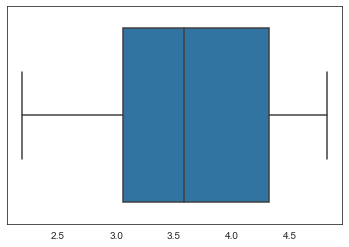

In [34]:
sns.boxplot(list(df[df.cohort=='CUP'].groupby('mouse').overall_rate.mean()))

In [ ]:
sns.boxplot(list(df.groupby('cohort').log_rate.mean()))

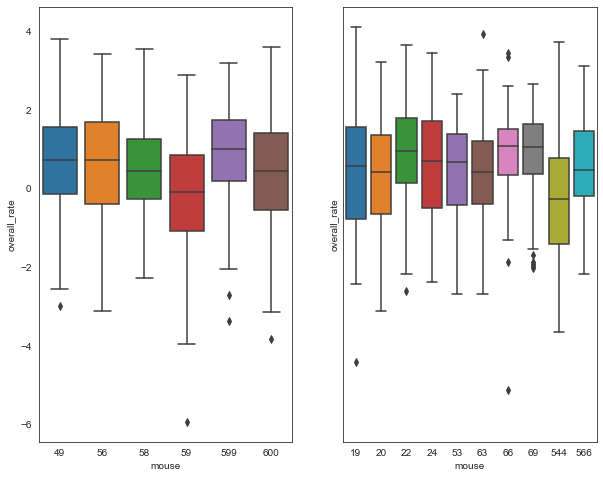

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8),sharey=True)
g1 = sns.boxplot(x=df_cntrl.mouse,y=np.log(df_cntrl.overall_rate),ax=ax1)
g2 = sns.boxplot(x=df_cup.mouse,y=np.log(df_cup.overall_rate),ax=ax2)
#ax1.set_ylim(0,20)
#ax2.set_ylim(0,20)

In [70]:
df_test = df[df.cohort2=='Dailey']

In [79]:
df = df.drop(['index','level_0'],axis=1)

ValueError: cannot reindex from a duplicate axis

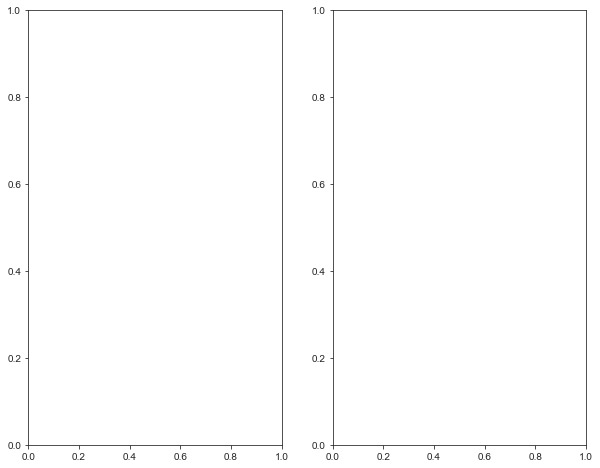

In [76]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
g1 = sns.boxplot(x='mouse',y='overall_rate',data=df_test[df_test.timepoint==2][df_test.cohort=='cntrl'],ax=ax1)
g2 = sns.boxplot(x='mouse',y='overall_rate',data=df_test[df_test.timepoint==2][df_test.cohort=='CUP'],ax=ax2)
ax1.set_ylim(0,20)
ax2.set_ylim(0,20)

In [196]:
df_test = df_all[df_all.mouse!=59][df_all.mouse!=69]

(0.0, 20.0)

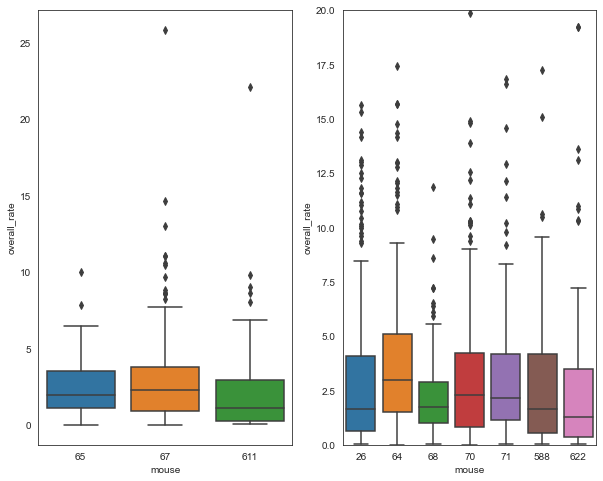

In [192]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
g1 = sns.boxplot(x='mouse',y='overall_rate',data=df_all[df_all.timepoint=='3'][df_all.cohort=='cntrl'],ax=ax1)
g2 = sns.boxplot(x='mouse',y='overall_rate',data=df_all[df_all.timepoint=='3'][df_all.cohort=='CUP'],ax=ax2)
plt.ylim(0,20)

In [179]:
df_['mouse'][df_.mouse== 54] = 544

In [9]:
df.mouse.unique()

array([ 11,  12,  19,  20,  22,  24,  26,  42,  43,  47,  49,  50,  51,
        53,  56,  58,  59,  63,  64,  65,  66,  67,  68,  69,  70,  71,
       544, 566, 588, 599, 600, 611, 622], dtype=int64)

In [181]:
df_all = pd.concat([df_d,df_])

In [30]:
#df_test = df_test.drop(['level_0'],axis=1)
#df= df_test[df_test.mouse!=59][df_test.mouse!=544][df_test.timepoint==2][df_test.cohort2=='Gustavo']
#df= df_test[df_test.group=='good'][df_test.timepoint==2][df_test.mouse!=59][df_test.cohort2=='Dailey'][df_test.mouse!=22][df_test.mouse!=24][df_test.mouse!=26][df_test.mouse!=47][df_test.mouse!=70]
df= df_test[df_test.group=='good'][df_test.timepoint=='2'][df_test.mouse!=59][df_test.mouse!=47][df_test.mouse!=70]

In [28]:
df_test['log_rate'] = np.log(df_test.overall_rate)

In [11]:
df_ = df[df.group=='good']

In [12]:
df_up = df_[df_.layer=='L2-3'][df_.waveform_class=='rs']
df_upr = df_[df_.layer=='L2-3'][df_.waveform_class=='fs']

df_run = df_[df_.layer=='L5'][df_.waveform_class=='rs']
df_up_5f = df_[df_.layer=='L5'][df_.waveform_class=='fs']

In [134]:
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}

PROPSc = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}}

In [138]:
df_run = dfs[dfs.waveform_class=='fs']

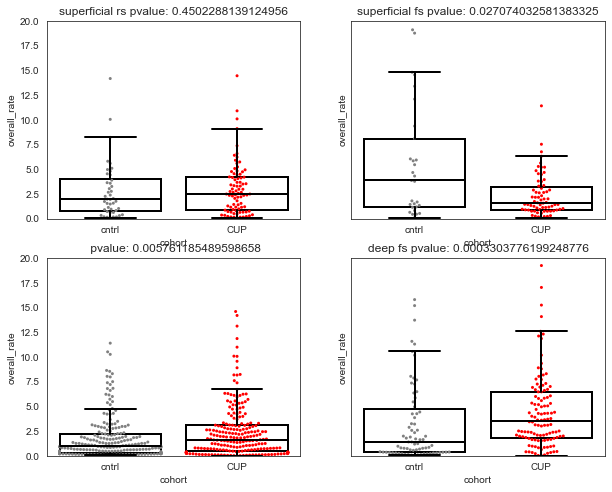

In [17]:
pval =stats.mannwhitneyu(df_up[df_up.cohort!='CUP']['overall_rate'],df_up[df_up.cohort!='cntrl']['overall_rate'])
pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP']['overall_rate'],df_upr[df_upr.cohort!='cntrl']['overall_rate'])
pval3 =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['overall_rate'],df_run[df_run.cohort!='cntrl']['overall_rate'])
pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())
order = ['cntrl','CUP']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,8),sharey=True,squeeze=True)
#fig, ax3 = plt.subplots(1,figsize = (10,8),sharey=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
g1 = sns.boxplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df_run.cohort,y=df_run.overall_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

g1 = sns.swarmplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,order=order,size=3,palette=dict(cntrl="gray",CUP="red"),zorder=1)
g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,order=order,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g3 = sns.swarmplot(x=df_run.cohort,y=df_run.overall_rate, order=order,ax=ax3,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,order=order,ax=ax4,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)

ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title(' pvalue: ' +str(pval3[1]))
ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

ax1.set_ylim(0,20)
ax2.set_ylim(0,20)
ax3.set_ylim(0,20)
ax4.set_ylim(0,20)

plt.show()
plt.close()
path = r'C:\Users\Kim\Documents\conferences\figures\FiringRates.svg'
fig.savefig(str(path))

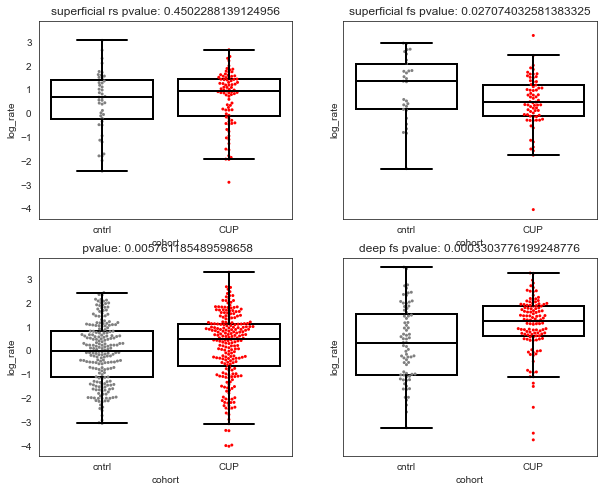

In [164]:
pval =stats.mannwhitneyu(df_up[df_up.cohort!='CUP']['overall_rate'],df_up[df_up.cohort!='cntrl']['overall_rate'])
pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP']['overall_rate'],df_upr[df_upr.cohort!='cntrl']['overall_rate'])
pval3 =stats.mannwhitneyu(df_run[df_run.cohort!='CUP']['overall_rate'],df_run[df_run.cohort!='cntrl']['overall_rate'])
pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())
order = ['cntrl','CUP']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,8),sharey=True,squeeze=True)
#fig, ax3 = plt.subplots(1,figsize = (10,8),sharey=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
g1 = sns.boxplot(x=df_up.cohort,y=df_up.log_rate,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.log_rate,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df_run.cohort,y=df_run.log_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.log_rate,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

g1 = sns.swarmplot(x=df_up.cohort,y=df_up.log_rate,ax=ax1,order=order,size=3,palette=dict(cntrl="gray",CUP="red"),zorder=1)
g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.log_rate,ax=ax2,order=order,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g3 = sns.swarmplot(x=df_run.cohort,y=df_run.log_rate, order=order,ax=ax3,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.log_rate,order=order,ax=ax4,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)

ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title(' pvalue: ' +str(pval3[1]))
ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

#ax1.set_ylim(0,25)
#ax2.set_ylim(0,25)
#ax3.set_ylim(0,25)
#ax4.set_ylim(0,25)

plt.show()
plt.close()
path = r'Z:\BIOElectricsLab\Kim\GRCmyelin_Figures\FiringRates\TP3.svg'
#fig.savefig(str(path))

In [129]:
df['cohortt'] = 'mobp2'
df_MOBP['cohortt'] = 'mobp3'

In [130]:
df = pd.concat([df,df_MOBP])

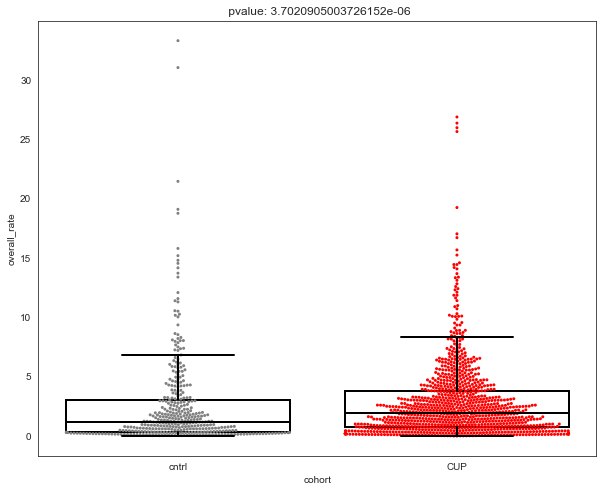

In [135]:
#pval =stats.mannwhitneyu(df_up[df_up.cohort!='CUP']['overall_rate'],df_up[df_up.cohort!='cntrl']['overall_rate'])
#pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP']['overall_rate'],df_upr[df_upr.cohort!='cntrl']['overall_rate'])
#pval3 =stats.mannwhitneyu(df[df.waveform_class=='rs'][df.cohort!='CUP']['overall_rate'],df[df.waveform_class=='rs'][df.cohort!='cntrl']['overall_rate'])
pval3 =stats.mannwhitneyu(df[df.cohort!='CUP']['overall_rate'],df[df.cohort!='cntrl']['overall_rate'])

#pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())
order = ['cntrl','CUP']

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,8),sharey=True,squeeze=True)
fig, ax3 = plt.subplots(1,figsize = (10,8),sharey=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
#g1 = sns.boxplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
#g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
#g3 = sns.boxplot(x=df[df.waveform_class=='rs'].cohort,y=df[df.waveform_class=='rs'].overall_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df.cohort,y=df.overall_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

#g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

#g1 = sns.swarmplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,order=order,size=3,palette=dict(cntrl="gray",CUP="red"),zorder=1)
#g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,order=order,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
#g3 = sns.swarmplot(x=df[df.waveform_class=='rs'].cohort,y=df[df.waveform_class=='rs'].overall_rate, order=order,ax=ax3,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g3 = sns.swarmplot(x=df[df.cohortt='mobp3'].cohort,y=df[df.cohortt='mobp3'].overall_rate, order=order,ax=ax3,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)

#g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,order=order,ax=ax4,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)

#ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
#ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title(' pvalue: ' +str(pval3[1]))
#ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

#ax1.set_ylim(0,25)
#ax2.set_ylim(0,25)
#ax3.set_ylim(0,25)
#ax4.set_ylim(0,25)

plt.show()
plt.close()
path = r'Z:\BIOElectricsLab\Kim\GRCmyelin_Figures\FiringRates\TP3.svg'
#fig.savefig(str(path))

In [137]:
df_test = df_[df_.cohort!='CUP']

In [138]:
df_all = df

In [139]:
df = pd.concat([df_test,df_MOBP])

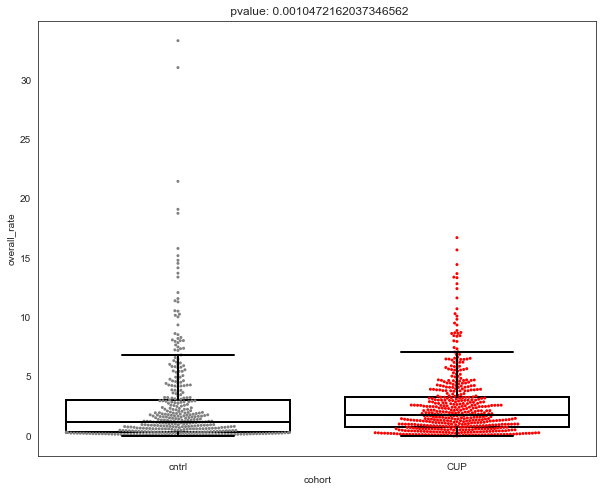

In [140]:
#pval =stats.mannwhitneyu(df_up[df_up.cohort!='CUP']['overall_rate'],df_up[df_up.cohort!='cntrl']['overall_rate'])
#pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP']['overall_rate'],df_upr[df_upr.cohort!='cntrl']['overall_rate'])
pval3 =stats.mannwhitneyu(df[df.cohort!='CUP']['overall_rate'],df[df.cohort!='cntrl']['overall_rate'])
#pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())
order = ['cntrl','CUP']

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,8),sharey=True,squeeze=True)
fig, ax3 = plt.subplots(1,figsize = (10,8),sharey=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
#g1 = sns.boxplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
#g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df.cohort,y=df.overall_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
#g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

#g1 = sns.swarmplot(x=df_up.cohort,y=df_up.overall_rate,ax=ax1,order=order,size=3,palette=dict(cntrl="gray",CUP="red"),zorder=1)
#g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,order=order,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g3 = sns.swarmplot(x=df.cohort,y=df.overall_rate, order=order,ax=ax3,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
#g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,order=order,ax=ax4,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)

#ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
#ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title(' pvalue: ' +str(pval3[1]))
#ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

#ax1.set_ylim(0,25)
#ax2.set_ylim(0,25)
#ax3.set_ylim(0,25)
#ax4.set_ylim(0,25)

plt.show()
plt.close()
path = r'Z:\BIOElectricsLab\Kim\GRCmyelin_Figures\FiringRates\TP3.svg'
#fig.savefig(str(path))

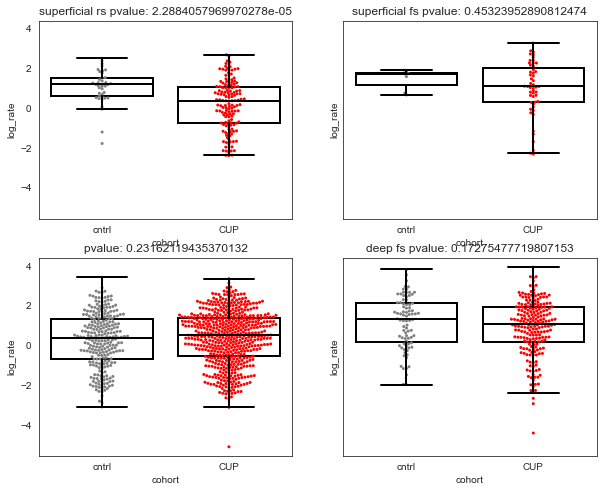

In [34]:
pval =stats.mannwhitneyu(df_up[df_up.cohort!='CUP']['overall_rate'],df_up[df_up.cohort!='cntrl']['overall_rate'])
pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP']['overall_rate'],df_upr[df_upr.cohort!='cntrl']['overall_rate'])
pval3 =stats.mannwhitneyu(df_up_5r[df_up_5r.cohort!='CUP']['log_rate'],df_up_5r[df_up_5r.cohort!='cntrl']['log_rate'])
pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())
order = ['cntrl','CUP']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,8),sharey=True,squeeze=True)
#fig, ax3 = plt.subplots(1,figsize = (10,8),sharey=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
g1 = sns.boxplot(x=df_up.cohort,y=df_up.log_rate,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.log_rate,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df_up_5r.cohort,y=df_up_5r.log_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.log_rate,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

g1 = sns.swarmplot(x=df_up.cohort,y=df_up.log_rate,ax=ax1,order=order,size=3,palette=dict(cntrl="gray",CUP="red"),zorder=1)
g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.log_rate,ax=ax2,order=order,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g3 = sns.swarmplot(x=df_up_5r.cohort,y=df_up_5r.log_rate, order=order,ax=ax3,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)
g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.log_rate,order=order,ax=ax4,size=3,palette=dict(cntrl="gray", CUP="red"),zorder=1)

ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title('pvalue: ' +str(pval3[1]))
ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

#ax1.set_ylim(0,25)
#ax2.set_ylim(0,25)
#ax3.set_ylim(0,25)
#ax4.set_ylim(0,25)

plt.show()
plt.close()
path = r'Z:\BIOElectricsLab\Kim\GRCmyelin_Figures\FiringRates\TP3.svg'
#fig.savefig(str(path))

In [183]:
df_run = df[df.cohort2=='Dailey'][df.timepoint==3][df.cohort=='cntrl']

<AxesSubplot:xlabel='mouse', ylabel='log_rate'>

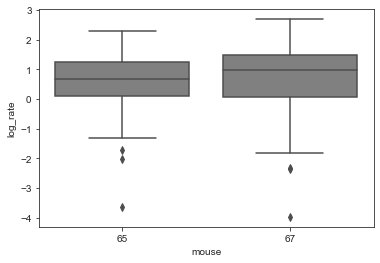

In [184]:
sns.boxplot(x='mouse',y='log_rate',data=df_run,color='gray')

# sorting quality // fr comparison

Text(0.5, 1.0, 'LDA projection of all quality metrics, based on phy labels')

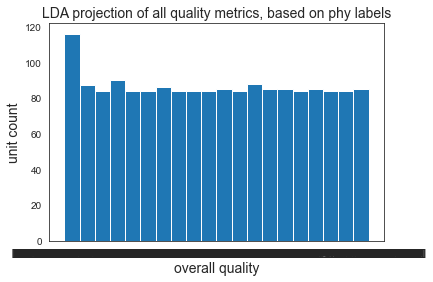

In [13]:
data = df.linear_quality
d=plt.hist(data,bins=20,stacked=True)
plt.xlabel('overall quality',size=14);plt.ylabel('unit count',size=14);plt.title('LDA projection of all quality metrics, based on phy labels',size=14)

In [28]:
df['log_rate'] = np.log(df.overall_rate)

In [54]:
df_good = df[df.linear_quality<0]

<AxesSubplot:xlabel='mouse', ylabel='overall_rate'>

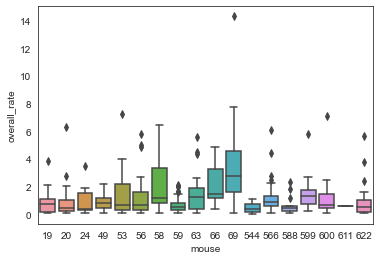

In [30]:
sns.boxplot(x='mouse',y='overall_rate',data=df_good)

<AxesSubplot:xlabel='mouse', ylabel='overall_rate'>

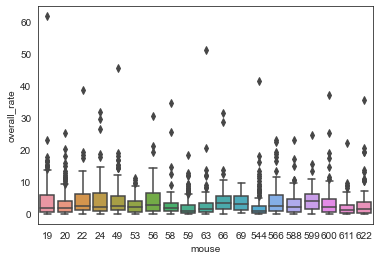

In [31]:
sns.boxplot(x='mouse',y='overall_rate',data=df_bad)

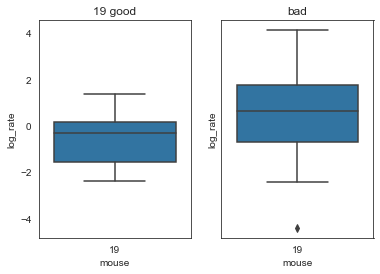

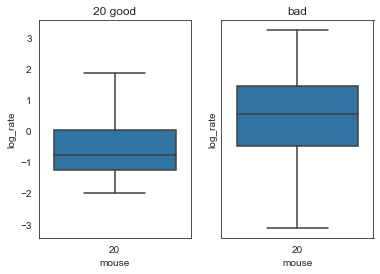

failed 22


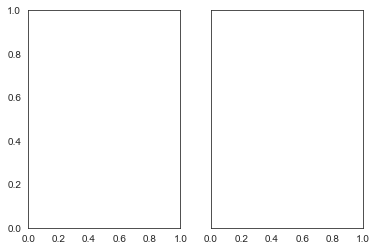

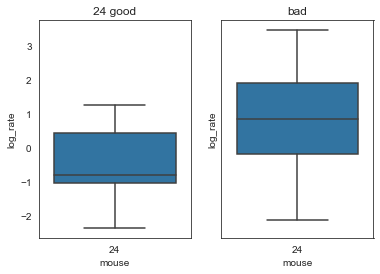

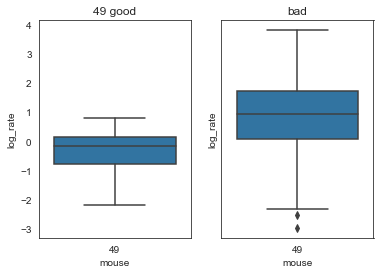

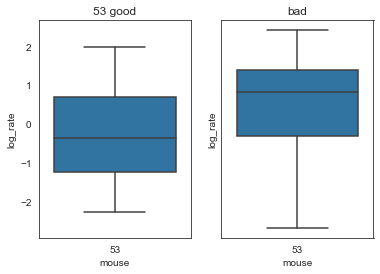

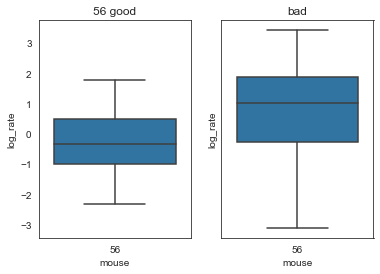

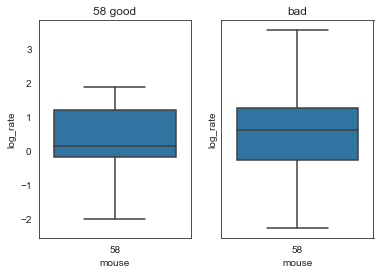

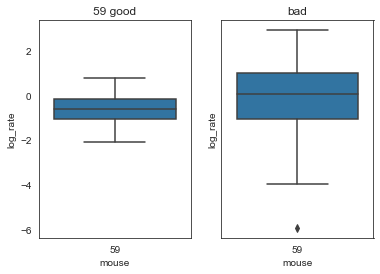

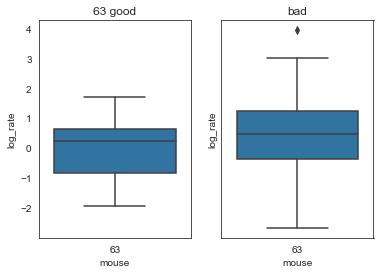

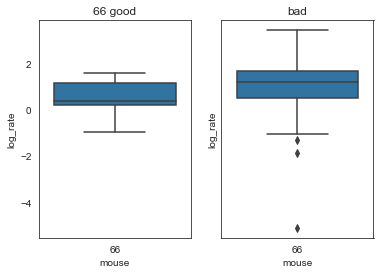

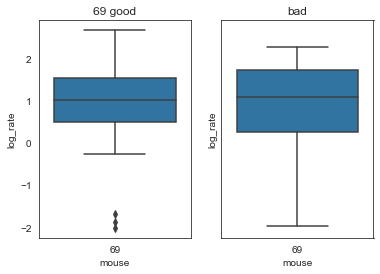

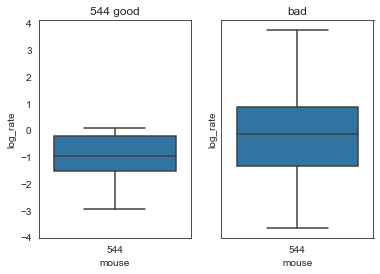

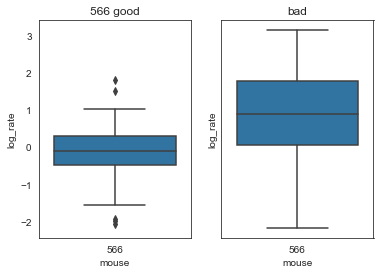

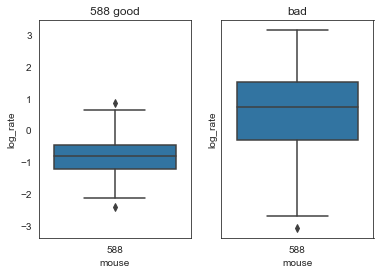

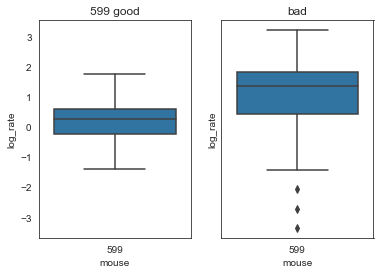

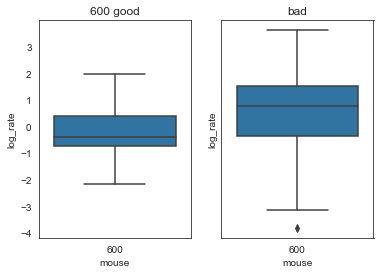

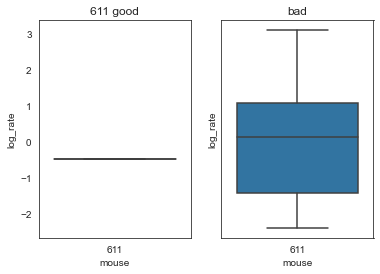

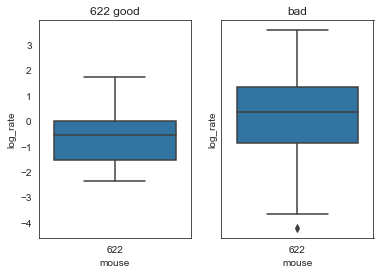

In [37]:
for i,mid in enumerate(df.mouse.unique()):
    try:
        df_ = df[df.mouse==mid]
        df_g = df_[df_.linear_quality<0]
        df_b = df_[df_.linear_quality>0]
        fix,(ax1,ax2) = plt.subplots(1,2,sharey=True)
        g1 = sns.boxplot(x='mouse',y='log_rate',data=df_g,ax=ax1)
        g1.set_title(str(mid)+ ' ' + 'good')
        g2 = sns.boxplot(x='mouse',y='log_rate',data=df_b,ax=ax2)
        g2.set_title('bad')
        plt.show()
        plt.close()
    except:
        print('failed ' + str(mid))
    

In [47]:
df_bad['log_rate'] = np.log(df_bad.overall_rate)

Text(0.5, 1.0, 'bad')

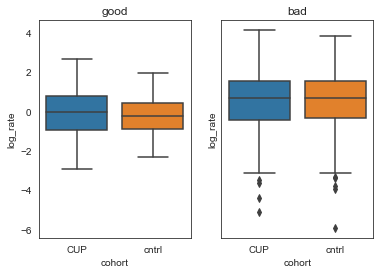

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
g1 = sns.boxplot(x='cohort',y='log_rate',data=df_good[df_good.timepoint==2],ax=ax1)
g1.set_title('good')
g2 = sns.boxplot(x='cohort',y='log_rate',data=df_bad[df_bad.timepoint==2],ax=ax2)
g2.set_title('bad')

<AxesSubplot:xlabel='cohort', ylabel='log_rate'>

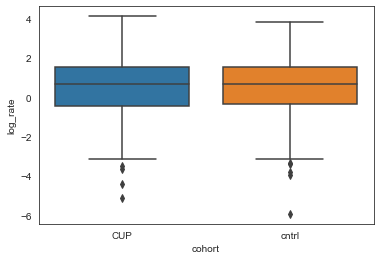

In [56]:
sns.boxplot(x='cohort',y='log_rate',data=df_bad[df_bad.timepoint==2])

In [49]:
df_good.groupby('cohort').log_rate.count()

cohort
CUP      202
cntrl    150
Name: log_rate, dtype: int64

In [50]:
df_bad.groupby('cohort').log_rate.count()

cohort
CUP      1383
cntrl     838
Name: log_rate, dtype: int64

# test of distributions

In [ ]:
test of the distributions/cumulative dist./shape

In [8]:
from scipy import stats

In [186]:
df_test = df

In [188]:
df_ = df_test[df_test.layer=='L5'][df_test.waveform_class=='rs'][df_test.timepoint==2][df_test.mouse!=59][df_test.cohort2=='Dailey']
#df__ = df_test[df_test.layer=='L5'][df_test.waveform_class=='rs'][df_test.mouse!=59][df_test.timepoint==2][df_test.cohort2=='Dailey']

In [265]:
df_ = df_test[df_test.layer=='L5'][df_test.waveform_class=='rs'][df_test.timepoint==2]
#df__ = df_test[df_test.layer=='L5'][df_test.waveform_class=='rs'][df_test.timepoint==2]

In [31]:
rvs = np.log(df[df.cohort=='cntrl'][df.waveform_class=='fs'].log_rate)
cdf = np.log(df[df.cohort=='CUP'][df.waveform_class=='fs'].log_rate)

In [22]:
pval = stats.kstest(rvs, cdf)[1]

In [87]:
df = df[df.group=='good']

In [40]:
df_test = df[df.waveform_class=='rs'][df.mod_up=='yes']

In [38]:
df_test = df_test[df_test.epoch_lograte>0]

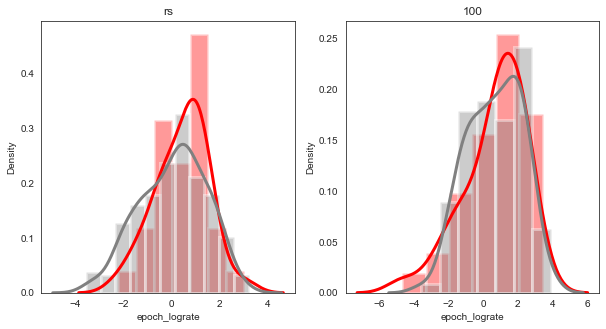

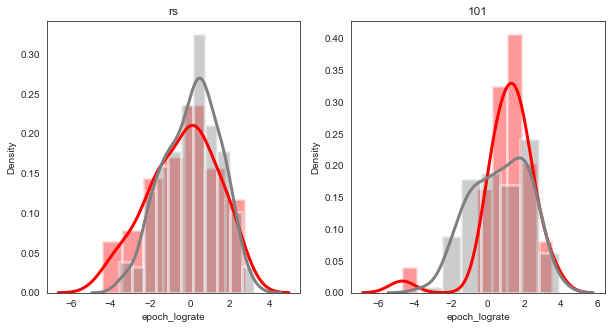

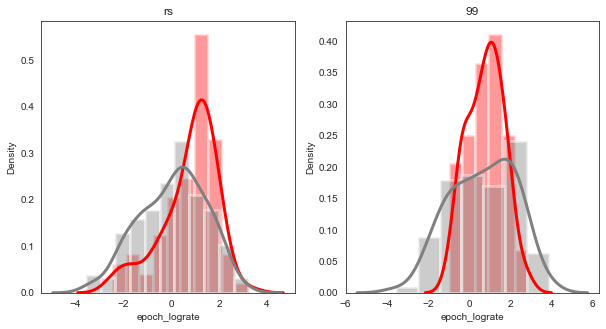

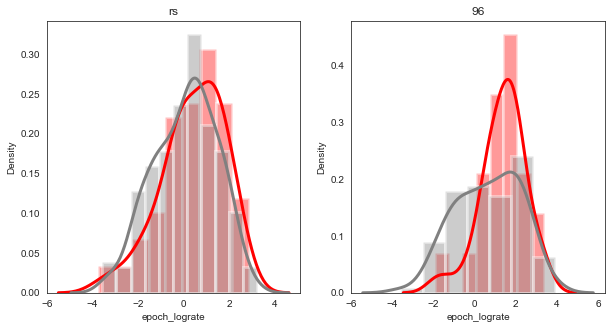

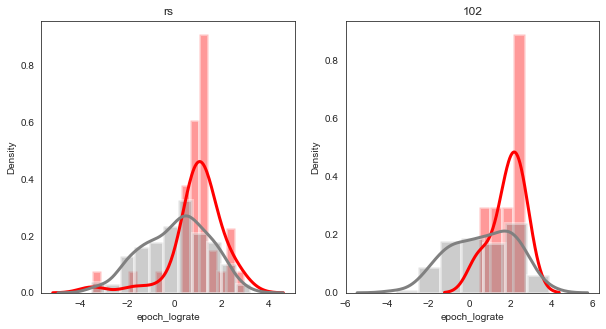

In [53]:
for mid in df[df.cohort=='CUP'].mouse.unique():
    df_fs = df[df.mouse==mid][df.waveform_class=='fs'][df.epochFR>0]
    df_rs = df[df.mouse==mid][df.waveform_class=='rs']
    df_fs_cntrl = df[df.cohort=='cntrl'][df.waveform_class=='fs']
    df_rs_cntrl = df[df.cohort=='cntrl'][df.waveform_class=='rs']
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    g1 = sns.distplot(df_rs[df_rs.mouse==mid].epoch_lograte, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="red",ax=ax1)
    g1 = sns.distplot(df_rs_cntrl.epoch_lograte, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="gray",ax=ax1)
    ax1.set_title('rs')
    g2 = sns.distplot(df_fs[df_fs.mouse==mid].epoch_lograte, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="red",ax=ax2)
    g2 = sns.distplot(df_fs_cntrl.epoch_lograte, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="gray",ax=ax2)
    ax2.set_title('fs')
    plt.title(str(mid))
    plt.show()
    plt.close()

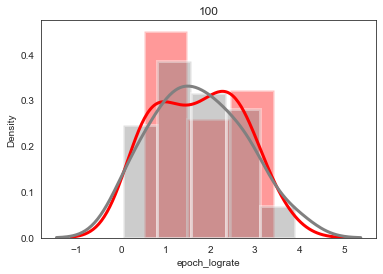

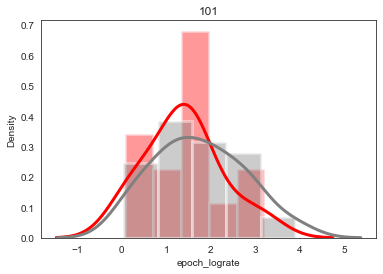

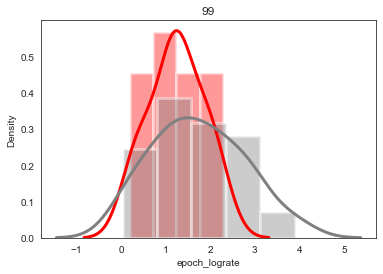

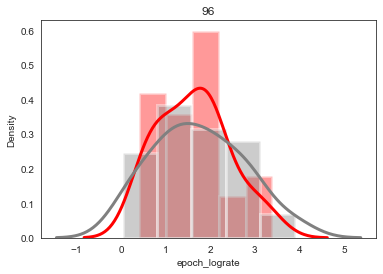

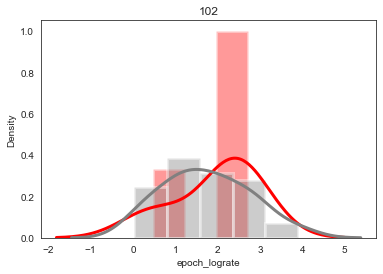

In [39]:
for mid in df[df.cohort=='CUP'].mouse.unique():
    sns.distplot(df_test[df_test.mouse==mid].epoch_lograte, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="red")
    sns.distplot(df_test[df_test.cohort=='cntrl'].epoch_lograte, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="gray")
    plt.title(str(mid))
    plt.show()
    plt.close()

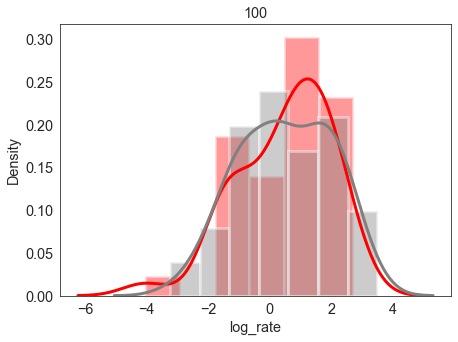

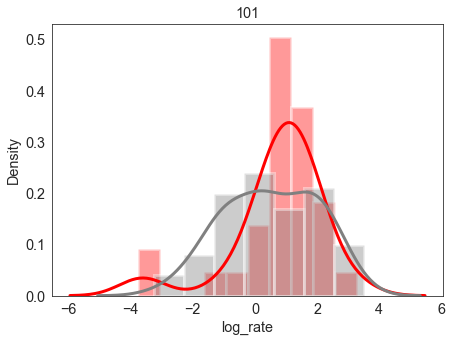

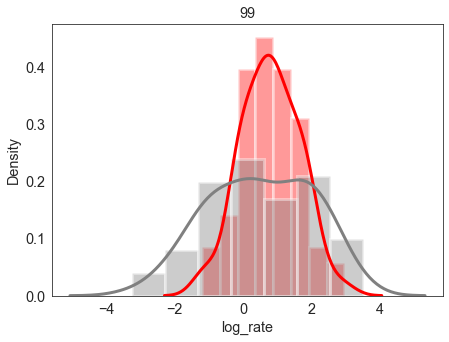

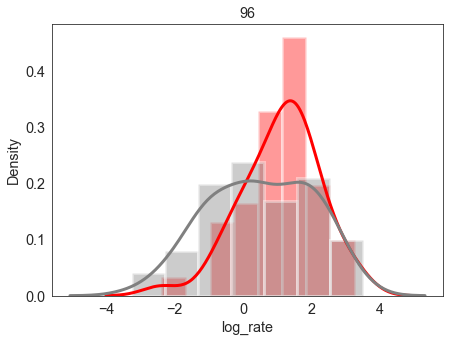

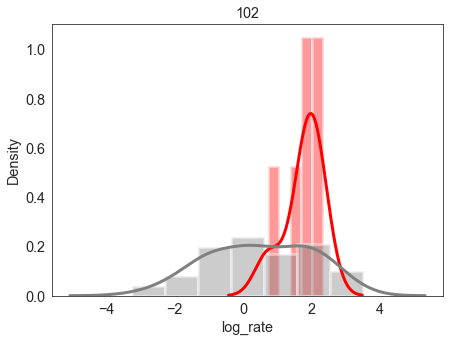

In [94]:
for mid in df[df.cohort=='CUP'].mouse.unique():
    sns.distplot(df_test[df_test.mouse==mid].log_rate, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="red")
    sns.distplot(df_test[df_test.cohort=='cntrl'].log_rate, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="gray")
    plt.title(str(mid))
    plt.show()
    plt.close()
    #plt.xlim(0,20)
#plt.title('102')

OverflowError: cannot convert float infinity to integer

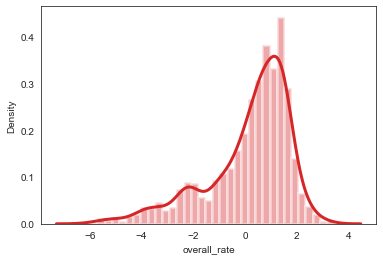

In [25]:
sns.distplot(np.log(df[df.cohort=='CUP'].overall_rate), hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="#d62728")
sns.distplot(np.log(df[df.cohort=='cntrl'].overall_rate), hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3},color="#3498db")

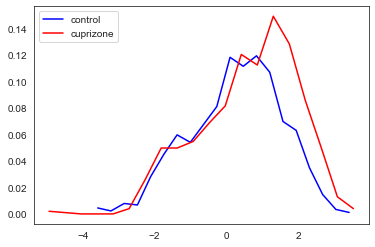

In [74]:
data = np.log(df[df.cohort=='cntrl'].overall_rate)
data2 = np.log(df[df.cohort=='CUP'].overall_rate)

count, bins_count = np.histogram(data, bins=20)
count2, bins_count2 = np.histogram(data2, bins=20)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
pdf2 = count2/sum(count2)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
cdf2 = np.cumsum(pdf2)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="blue", label="control")
plt.plot(bins_count2[1:], pdf2, color="red", label="cuprizone")
#plt.plot(bins_count[1:], cdf, label="CDF")
#plt.plot(bins_count2[1:],cdf2,label="CDF2")
plt.legend()
#plt.xlim(0,15)

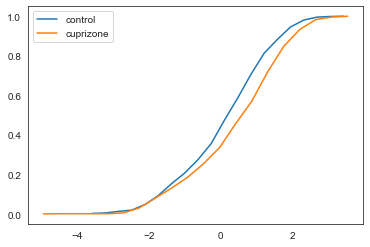

In [73]:
data = np.log(df[df.cohort=='cntrl'].overall_rate)
data2 = np.log(df[df.cohort=='CUP'].overall_rate)

count, bins_count = np.histogram(data, bins=20)
count2, bins_count2 = np.histogram(data2, bins=20)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
pdf2 = count2/sum(count2)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
cdf2 = np.cumsum(pdf2)
  
# plotting PDF and CDF
#plt.plot(bins_count[1:], pdf, color="blue", label="PDF")
#plt.plot(bins_count2[1:], pdf2, color="red", label="PDF2")
plt.plot(bins_count[1:], cdf, label="control")
plt.plot(bins_count2[1:],cdf2,label="cuprizone")
plt.legend()
#plt.xlim(0,15)

In [29]:
df[df.cohort2=='Dailey'][df.timepoint==2].mouse.unique()

array([19, 20, 22, 24, 49, 53, 56, 58, 59, 63, 66, 69], dtype=int64)

In [209]:
df_all.to_json(r'C:\Users\Kim\Documents\Data\gustavo_data\df_DG.json')

In [208]:
df.mouse.unique()

array([11, 12, 19, 20, 22, 24, 26, 42, 43, 47, 49, 50, 51, 53, 56, 58, 63,
       64, 65, 66, 67, 68, 70, 71], dtype=int64)

In [76]:
df_d['cohort2'] = 'Dailey'
df_['cohort2'] = 'Gustavo'

In [127]:
df_all = pd.concat([df_,df])

In [128]:
df_all = df_all.drop('level_0',axis=1)
df_all = df_all.reset_index()

In [125]:
df = df_d

In [126]:
df = df[df.mouse!=20][df.mouse!=22][df.mouse!=24][df.mouse!=26][df.mouse!=47][df.mouse!=50][df.mouse!=59][df.mouse!=69]

In [158]:
df_run = df_all[df_all.cohort=='CUP'][df_all.timepoint=='2']

Text(0.5, 1.0, 'cuprizone timepoint 2 : 0.00017372025005522377')

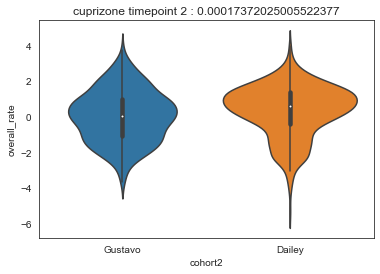

In [159]:
#sns.swarmplot(x=df_run.cohort2,y=np.log(df_run.overall_rate))
sns.violinplot(x=df_run.cohort2,y=np.log(df_run.overall_rate),**PROPS)
pval =stats.mannwhitneyu(df_run[df_run.cohort2=='Dailey']['overall_rate'],df_run[df_run.cohort2=='Gustavo']['overall_rate'])
plt.title('cuprizone timepoint 2 : ' + str(pval[1]))

In [161]:
for i in df_.mouse.unique():
    print(i)
    print(np.shape(df_[df_.mouse==i]))

54
(174, 26)
56
(103, 26)
58
(97, 26)
59
(102, 26)
60
(137, 26)
61
(61, 26)
62
(166, 26)


# movement-related

In [14]:
df

,index,reachInit,reachMax,reachEnd,stim,end_category,behaviors,mouse,cohort,rMax_t,timepoint,aligned
0,0,1274,1301,1353,0,reachLost,grasp_fail,42,cntrl1,14.920967,1,okay
1,1,8995,9010,9107,0,handStop,success,42,cntrl1,66.319467,1,okay
2,2,10955,10982,11037,0,reachLost,success,42,cntrl1,79.467467,1,okay
3,3,15362,15388,15455,0,handStop,success,42,cntrl1,108.843767,1,okay
4,4,16760,16820,16860,0,handStop,success,42,cntrl1,118.391400,1,okay
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,85,439462,439478,439516,0,manualAnnotation,success,49,cntrl2,2934.921200,2,yes
1217,86,451273,451317,451351,0,manualAnnotation,success,49,cntrl2,3013.855800,2,yes
1218,87,509472,509497,509537,0,manualAnnotation,success,49,cntrl2,3401.761633,2,yes
1219,88,522355,522370,522407,0,manualAnnotation,success,49,cntrl2,3487.590333,2,yes


In [412]:
df_up_ = df_up[df_up.layer=='L2-3'][df_up.waveform_class=='rs'][df_up.timepoint!='1'][df.mouse!=70][df.mouse!=22][df.mouse!=24]
df_upr = df_up[df_up.layer=='L2-3'][df_up.waveform_class=='fs'][df_up.timepoint!='1'][df.mouse!=70][df.mouse!=22][df.mouse!=24]

df_up_5r = df_up[df_up.layer=='L5'][df_up.waveform_class=='rs'][df_up.timepoint!='1'][df.mouse!=70][df.mouse!=22][df.mouse!=24]
df_up_5f = df_up[df_up.layer=='L5'][df_up.waveform_class=='fs'][df_up.timepoint!='1'][df.mouse!=70][df.mouse!=22][df.mouse!=24]

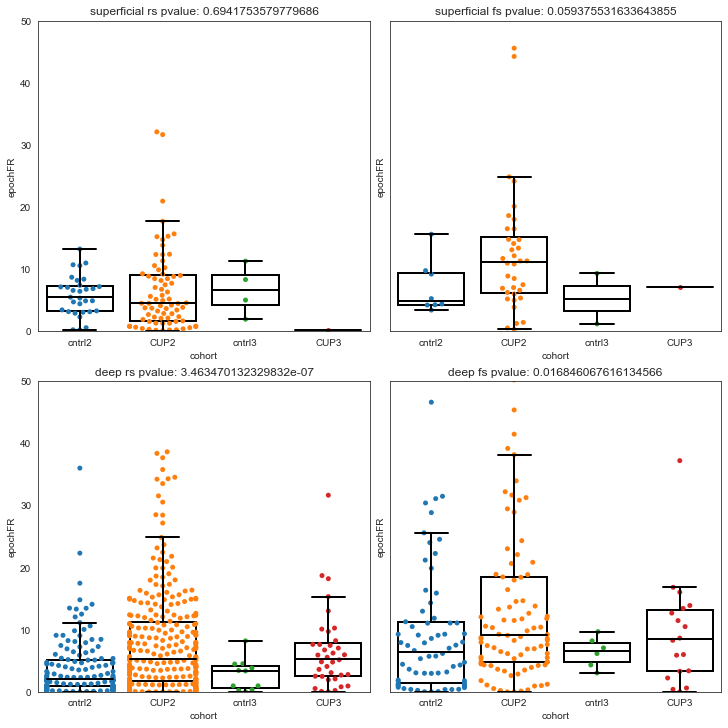

In [411]:
pval =stats.mannwhitneyu(df_up_[df_up_.cohort!='CUP2']['epochFR'],df_up_[df_up_.cohort!='cntrl2']['epochFR'])
pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP2']['epochFR'],df_upr[df_upr.cohort!='cntrl2']['epochFR'])
pval3 =stats.mannwhitneyu(df_up_5r[df_up_5r.cohort!='CUP2']['epochFR'],df_up_5r[df_up_5r.cohort!='cntrl2']['epochFR'])
pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP2']['epochFR'],df_up_5f[df_up_5f.cohort!='cntrl2']['epochFR'])

pval_ =stats.mannwhitneyu(df_up_[df_up_.cohort!='CUP3']['epochFR'],df_up_[df_up_.cohort!='cntrl3']['epochFR'])
pval2_ =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP3']['epochFR'],df_upr[df_upr.cohort!='cntrl3']['epochFR'])
pval3_ =stats.mannwhitneyu(df_up_5r[df_up_5r.cohort!='CUP3']['epochFR'],df_up_5r[df_up_5r.cohort!='cntrl3']['epochFR'])
pval4_ =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP3']['epochFR'],df_up_5f[df_up_5f.cohort!='cntrl3']['epochFR'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())

order = ['cntrl2','CUP2','cntrl3','CUP3']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,10),sharey=True,constrained_layout=True,squeeze=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
g1 = sns.boxplot(x=df_up_.cohort,y=df_up_.epochFR,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.epochFR,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df_up_5r.cohort,y=df_up_5r.epochFR,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.epochFR,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

g1 = sns.swarmplot(x=df_up_.cohort,y=df_up_.epochFR,ax=ax1,order=order,size=5,zorder=1)
g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.epochFR,ax=ax2,order=order,size=5,zorder=1)
g3 = sns.swarmplot(x=df_up_5r.cohort,y=df_up_5r.epochFR, ax=ax3,order=order,size=5,zorder=1)
g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.epochFR,ax=ax4,size=5,order=order,zorder=1)

ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title('deep rs pvalue: ' +str(pval3[1]))
ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

#ax1.set_title('TP3_superficial rs pvalue: ' + str(pval[1]))
#ax2.set_title('TP3_superficial fs pvalue: ' +str(pval2[1]))
#ax3.set_title('TP3_deep rs pvalue: ' +str(pval3[1]))
#ax4.set_title('TP3_deep fs pvalue: ' +str(pval4[1]))

ax1.set_ylim(0,50)
ax2.set_ylim(0,50)
ax3.set_ylim(0,50)
ax4.set_ylim(0,50)

plt.show()
plt.close()
path = r'C:\Users\Kim\Documents\Data\daileydata\GRCmyelinFigs\RERUN_forfinalfigures\movement_modulated\all_TPs.svg'
#fig.savefig(str(path))

# depth distributions

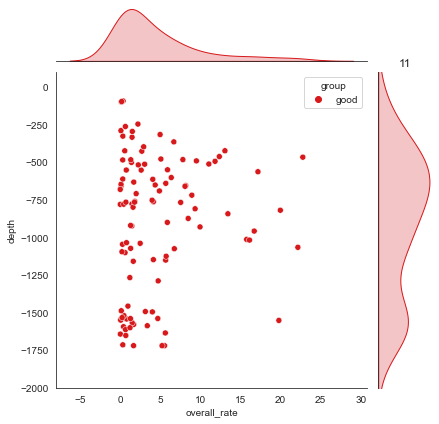

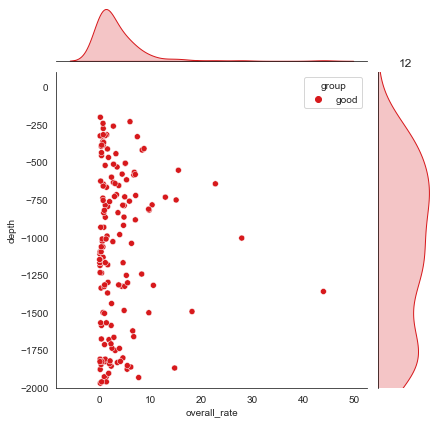

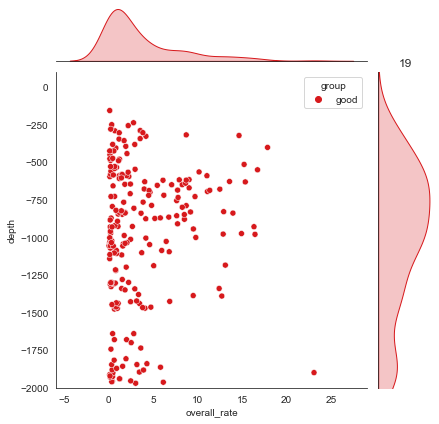

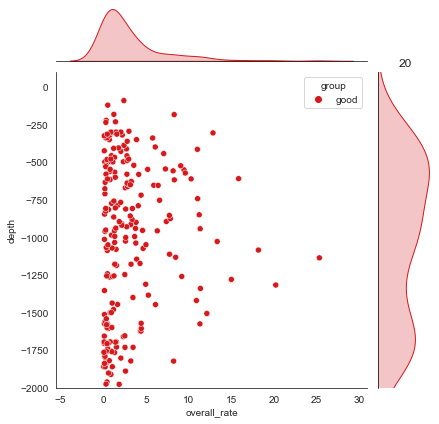

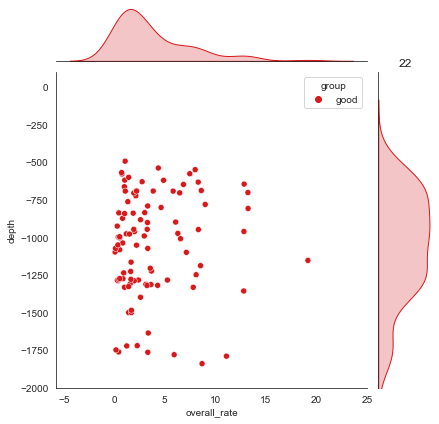

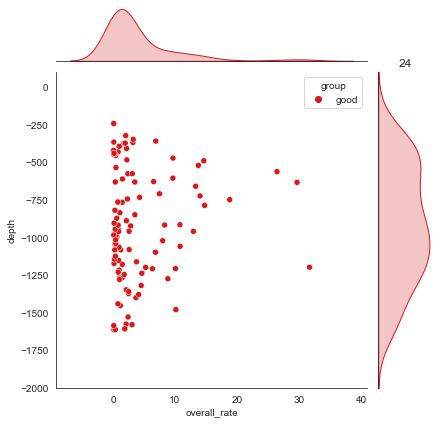

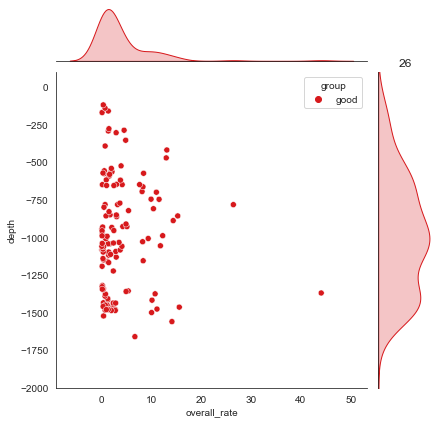

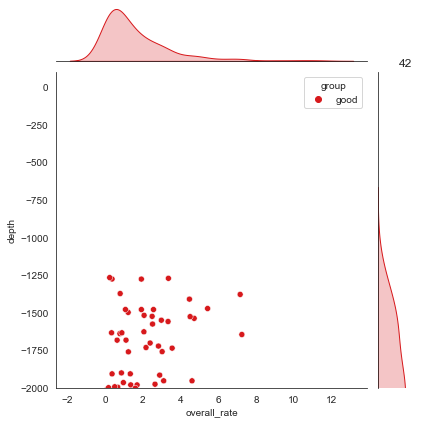

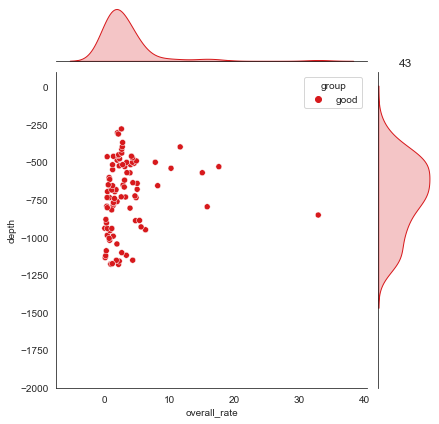

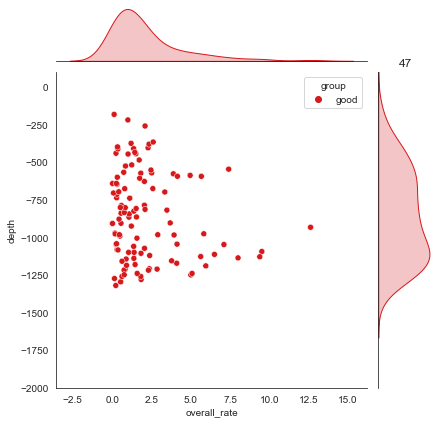

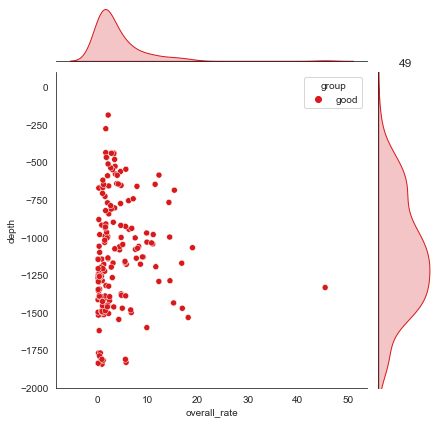

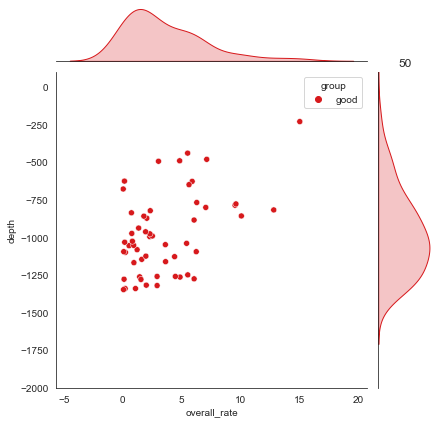

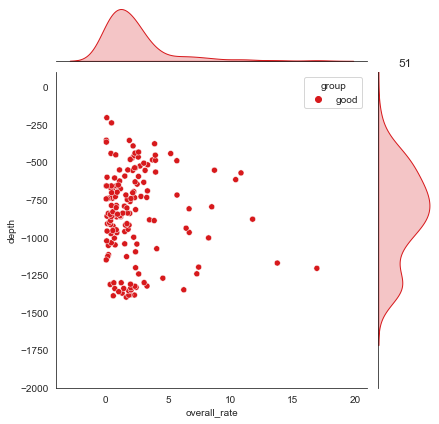

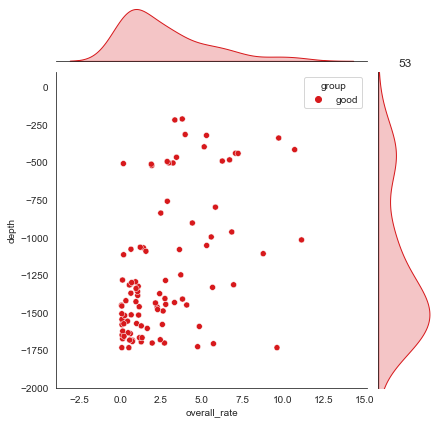

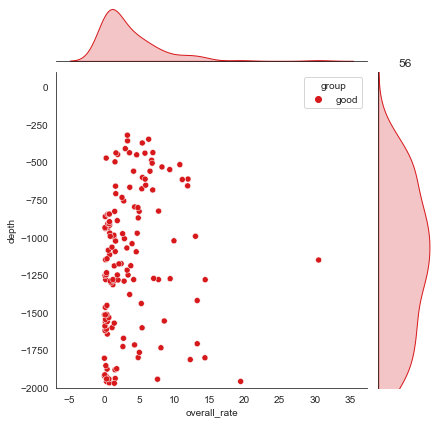

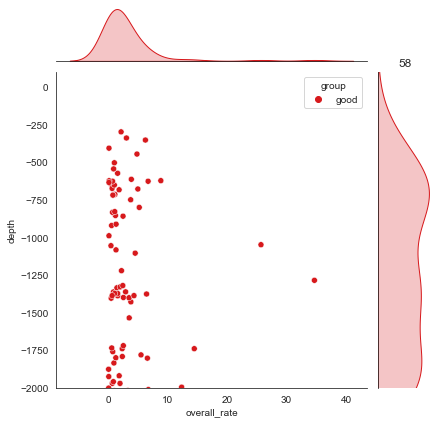

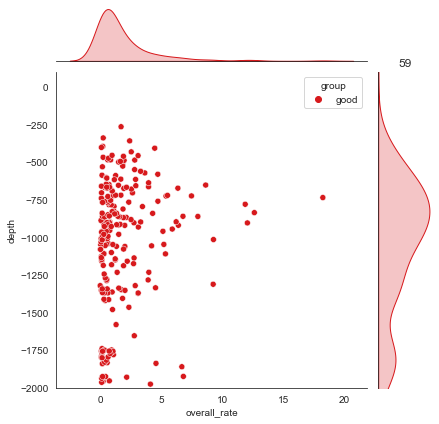

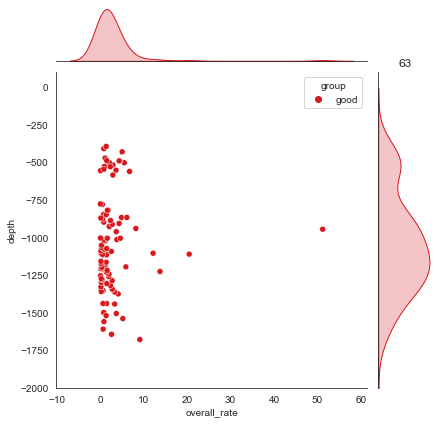

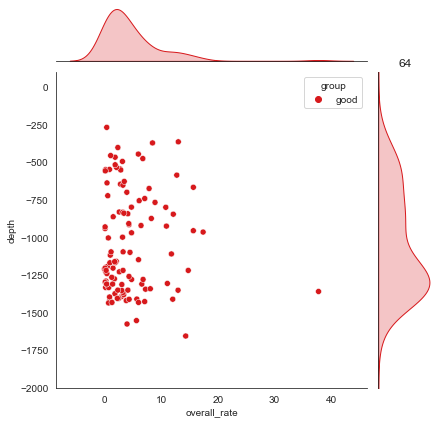

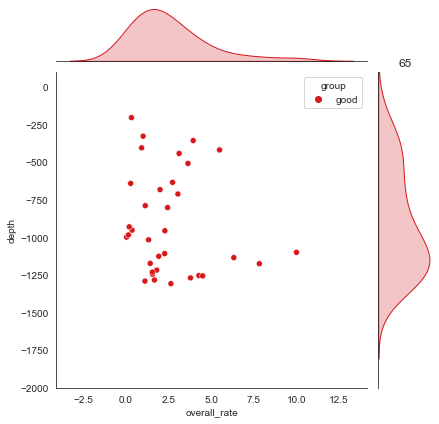

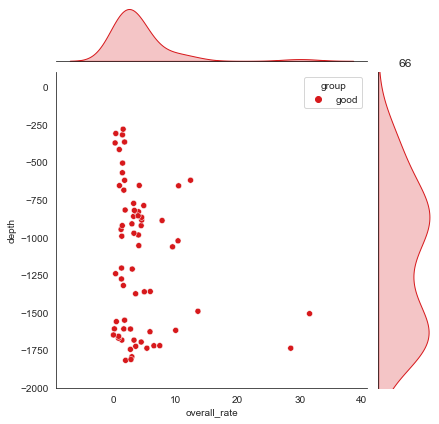

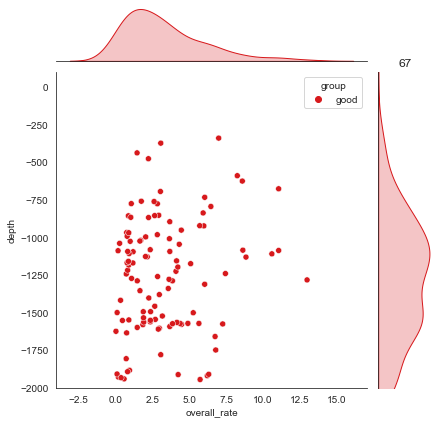

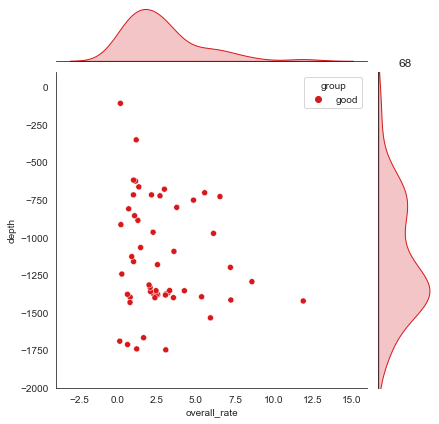

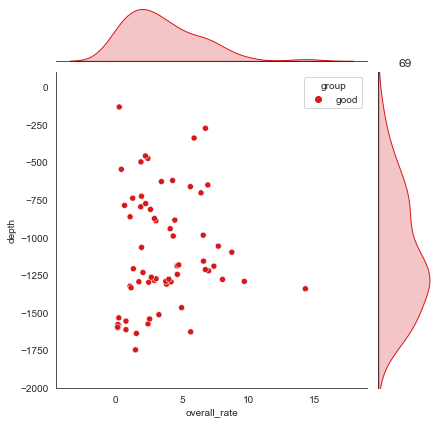

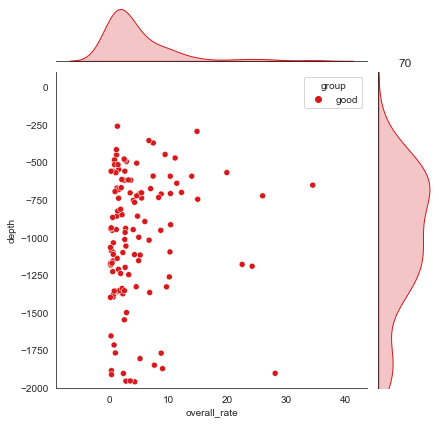

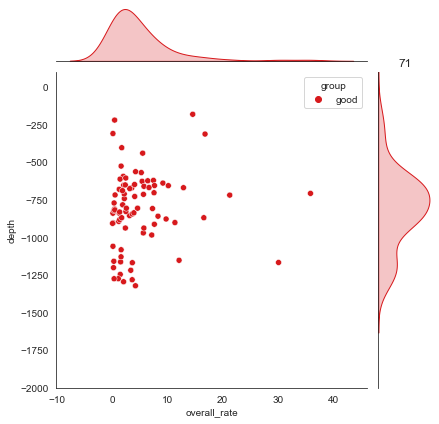

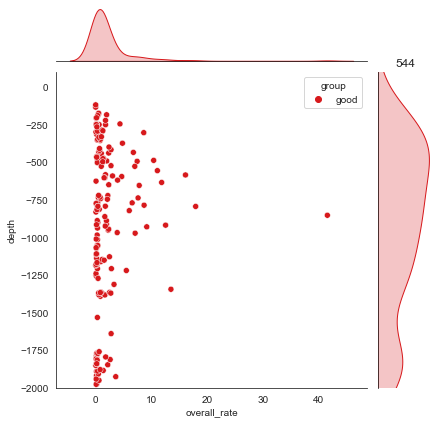

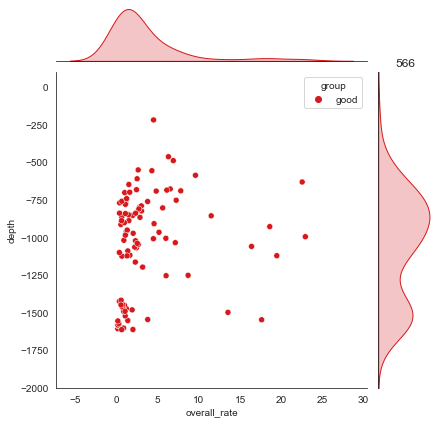

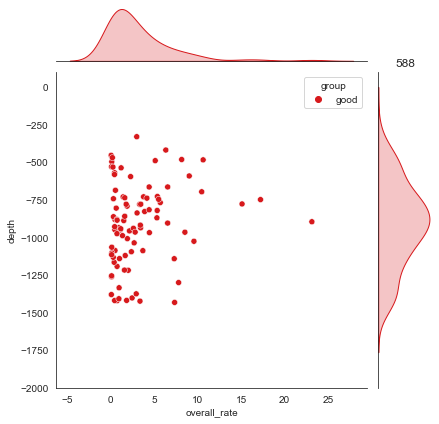

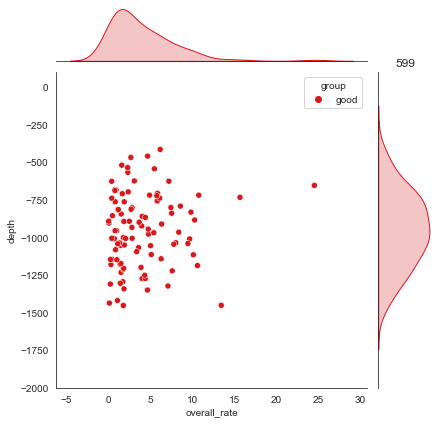

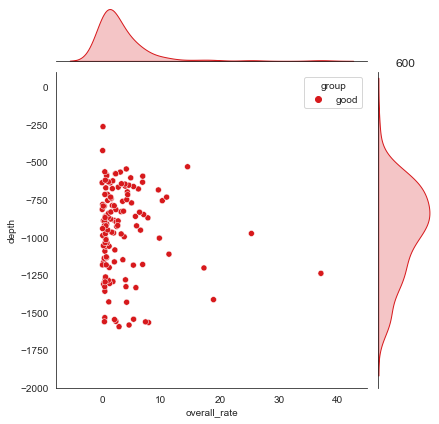

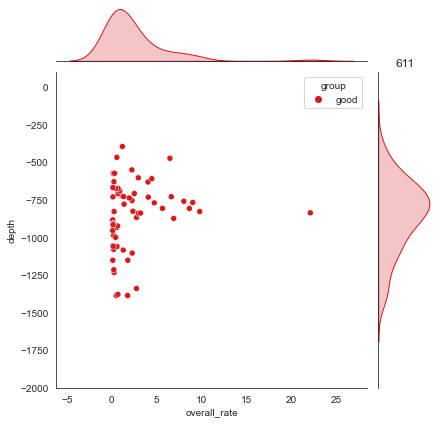

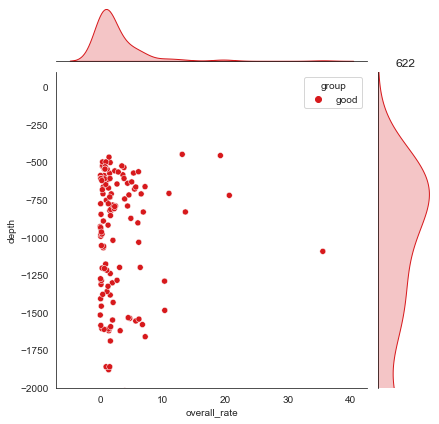

In [30]:
for mouseid in df.mouse.unique():
    df_ = df[df.mouse==mouseid]
    df_ = df_[df_.waveform_class!='up'][df_.waveform_class!='axon'][df_.group=='good']
    
    ylim = np.max(df_.ypos)+100
    
    g = sns.jointplot(x = df_.overall_rate,
                        y = df_.depth,
                        hue = df_.group, 
                        palette={'good': '#d7191c','mua': '#2b83ba'})  
    plt.ylim(-2000,100)
    plt.title(str(mouseid))
    #plt.title('distribution of firing rate over depth -- mouse: ' + str(mouseid))
    #g = g.annotate(depth, fontsize=18)
    plt.show()
    plt.close()
    
#    g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
#g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
#g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

#kind = "reg"
    

(-2000.0, 0.0)

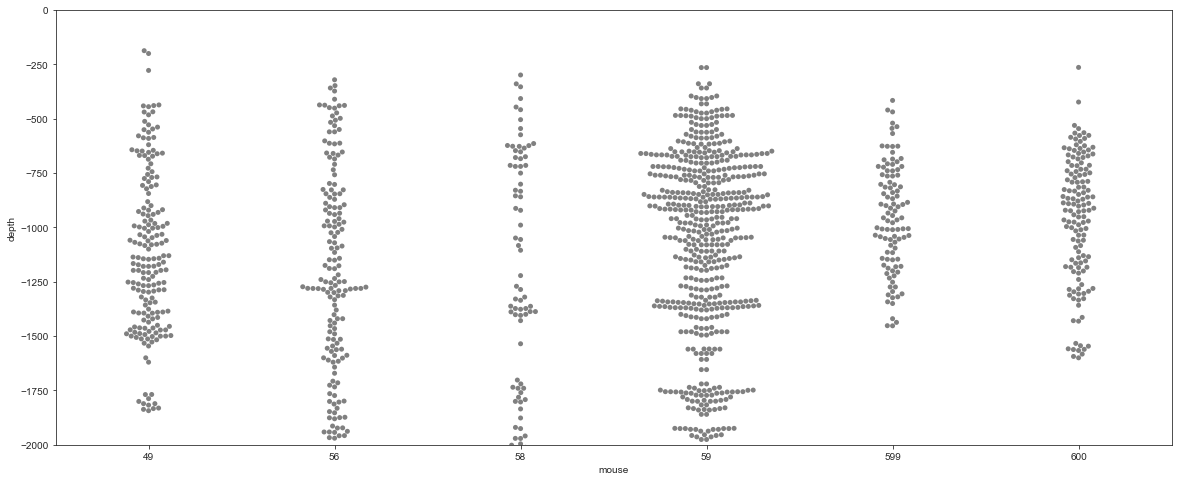

In [195]:
plt.figure(figsize=(20,8))
sns.swarmplot(x='mouse',y='depth',data=df[df.timepoint==2][df.cohort=='cntrl'],color='gray')
plt.ylim(-2000,0)

In [51]:
df_59 = df[df.mouse==59]

In [54]:
new_ts = []
for t in df_59.times:
    new_t = [i for i in t if i >= 600]
    new_ts.append(new_t)

In [64]:
from dlab import preprocessing_pipeline as preprocessing

In [67]:
df_59 = preprocessing.get_unit_info(df_59)

In [68]:
df = df[df.mouse!=59]

In [80]:
df = pd.concat([df,df_59],ignore_index=True)

In [ ]:
df = df.drop(['level_0'])

<AxesSubplot:xlabel='mouse', ylabel='overall_rate'>

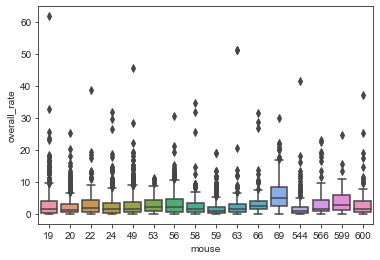

In [81]:
sns.boxplot(x='mouse',y='overall_rate',data=df[df.timepoint==2])

# spontaneous

In [369]:
df_up = df[df.mouse!=70][df.mouse!=22][df.mouse!=24]

In [27]:
df_up = df

In [28]:
df_up_ = df_up[df_up.layer=='L2-3'][df_up.waveform_class=='rs']
df_upr = df_up[df_up.layer=='L2-3'][df_up.waveform_class=='fs']

df_up_5r = df_up[df_up.layer=='L5'][df_up.waveform_class=='rs']
df_up_5f = df_up[df_up.layer=='L5'][df_up.waveform_class=='fs']

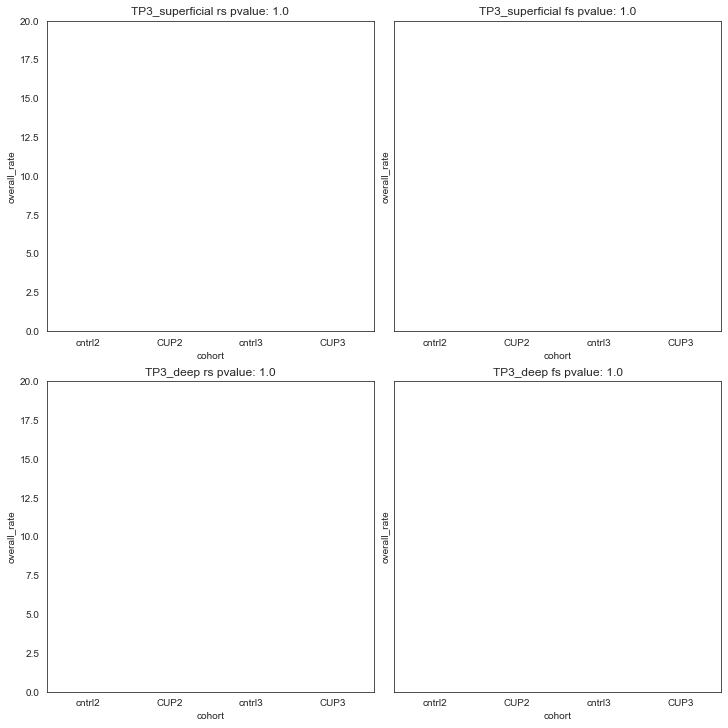

In [31]:
pval =stats.mannwhitneyu(df_up_[df_up_.cohort!='CUP2']['overall_rate'],df_up_[df_up_.cohort!='cntrl2']['overall_rate'])
pval2 =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP2']['overall_rate'],df_upr[df_upr.cohort!='cntrl2']['overall_rate'])
pval3 =stats.mannwhitneyu(df_up_5r[df_up_5r.cohort!='CUP2']['overall_rate'],df_up_5r[df_up_5r.cohort!='cntrl2']['overall_rate'])
pval4 =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP2']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl2']['overall_rate'])

pval_ =stats.mannwhitneyu(df_up_[df_up_.cohort!='CUP3']['overall_rate'],df_up_[df_up_.cohort!='cntrl3']['overall_rate'])
pval2_ =stats.mannwhitneyu(df_upr[df_upr.cohort!='CUP3']['overall_rate'],df_upr[df_upr.cohort!='cntrl3']['overall_rate'])
pval3_ =stats.mannwhitneyu(df_up_5r[df_up_5r.cohort!='CUP3']['overall_rate'],df_up_5r[df_up_5r.cohort!='cntrl3']['overall_rate'])
pval4_ =stats.mannwhitneyu(df_up_5f[df_up_5f.cohort!='CUP3']['overall_rate'],df_up_5f[df_up_5f.cohort!='cntrl3']['overall_rate'])

#sem = list(sem(cntrl))
#mn = list(df_run.groupby('cohort').log_epochfr.mean())

order = ['cntrl2','CUP2','cntrl3','CUP3']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10,10),sharey=True,constrained_layout=True)
#fig, (ax3, ax4) = plt.subplots(1,2,figsize = (10,8),sharey=True)
g1 = sns.boxplot(x=df_up_.cohort,y=df_up_.overall_rate,ax=ax1,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g2 = sns.boxplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g3 = sns.boxplot(x=df_up_5r.cohort,y=df_up_5r.overall_rate,ax=ax3,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)
g4 = sns.boxplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,color='white',order=order,linewidth=2,zorder=10000000,showfliers=False,**PROPS)

g1 = sns.swarmplot(x=df_up_.cohort,y=df_up_.overall_rate,ax=ax1,order=order,size=3,zorder=1)
g2 = sns.swarmplot(x=df_upr.cohort,y=df_upr.overall_rate,ax=ax2,order=order,size=3,zorder=1)
g3 = sns.swarmplot(x=df_up_5r.cohort,y=df_up_5r.overall_rate, ax=ax3,order=order,size=3,zorder=1)
g4 = sns.swarmplot(x=df_up_5f.cohort,y=df_up_5f.overall_rate,ax=ax4,size=3,order=order,zorder=1)

ax1.set_title('superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title('deep rs pvalue: ' +str(pval3[1]))
ax4.set_title('deep fs pvalue: ' +str(pval4[1]))

ax1.set_title('TP3_superficial rs pvalue: ' + str(pval[1]))
ax2.set_title('TP3_superficial fs pvalue: ' +str(pval2[1]))
ax3.set_title('TP3_deep rs pvalue: ' +str(pval3[1]))
ax4.set_title('TP3_deep fs pvalue: ' +str(pval4[1]))

ax1.set_ylim(0,20)
ax2.set_ylim(0,20)
ax3.set_ylim(0,20)
ax4.set_ylim(0,20)

plt.show()
plt.close()
path = r'C:\Users\Kim\Documents\Data\daileydata\GRCmyelinFigs\RERUN_forfinalfigures\movement_modulated\all_TPs_spontaneous.svg'
#fig.savefig(str(path))

In [365]:
df[df.timepoint=='2'].mouse.unique()

array([19, 20, 22, 24, 49, 53, 56, 58, 59, 63, 66, 69], dtype=int64)

In [372]:
df

,group,times,template,waveform_weights,xpos,ypos,mouse,experiment,probe,cell,...,bin_ave,norm_bin_ave,mod_up,mod_down,peakfr_up,peakfr_down,max_epochfr,min_epochfr,timepoint,aligned
0,good,"[0.029500000000000002, 0.08020000000000001, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",50.074407,2664.046438,11,placeholder,A,189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,yes
1,good,"[4.6227, 4.6781666667, 4.7935666667, 5.1767666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",39.412200,2652.904283,11,placeholder,A,199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,yes
2,good,"[2.9735333333, 8.3125666667, 8.9925333333, 9.5...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",53.000000,2651.332631,11,placeholder,A,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,yes
3,good,"[0.7921, 1.4361000000000002, 2.6491333333, 2.7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",46.473334,2614.160372,11,placeholder,A,202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,yes
4,good,"[4.6546666667, 4.7323, 4.9209333333, 8.2438666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",9.329339,2653.405461,11,placeholder,A,205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,good,"[1.6524, 1.9534666667, 2.4708333333, 2.5140000...",NaN,NaN,NaN,NaN,28,NaN,NaN,264,...,"[0.0125, 0.0125, 0.05, 0.075, 0.0625, 0.05, 0....","[0.0434782609, 0.0434782609, 0.1739130435, 0.2...",yes,no,0.260,-0.357,1.25,3.469447e-17,3,no
3582,good,"[0.0297333333, 0.0921666667, 0.1643666667, 0.4...",NaN,NaN,NaN,NaN,28,NaN,NaN,274,...,"[0.0375, 0.0125, 0.0125, 0.0, 0.025, 0.0, 0.0,...","[1.0, 0.33333333330000003, 0.33333333330000003...",no,no,-0.374,-0.274,1.25,3.469447e-17,3,no
3583,good,"[0.08826666670000001, 0.2524333333, 0.4566, 0....",NaN,NaN,NaN,NaN,28,NaN,NaN,275,...,"[0.025, 0.025, 0.0375, 0.025, 0.0125, 0.0375, ...","[0.2857142857, 0.2857142857, 0.4285714286, 0.2...",no,yes,-0.400,-0.091,1.25,3.469447e-17,3,no
3584,good,"[1.7710333333000001, 1.9750333333, 3.200966666...",NaN,NaN,NaN,NaN,28,NaN,NaN,277,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, ...",yes,yes,-0.401,-0.401,1.25,3.469447e-17,3,no


In [415]:
df_up[df_up.timepoint=='2'].mouse.unique()

array([53, 56, 58, 66, 69, 20, 59, 19], dtype=int64)

In [436]:
df_up = df_[df_.mod_up=='yes'][df_.mouse!=70]

In [437]:
df_.mouse.unique()

array([42, 47, 51, 53, 56, 58, 64, 65, 66, 68, 69, 11, 20, 59, 19],
      dtype=int64)

In [442]:
df_up[df_up.waveform_class=='rs'][df_up.layer=='L2-3'].groupby('cohort').overall_rate.count()


cohort
CUP1      13
CUP2      73
CUP3      11
cntrl1    30
cntrl2    37
cntrl3     4
Name: overall_rate, dtype: int64

In [152]:
dfs = df[df.mouse==100]


In [153]:
dfs['mouse'] = 1

In [154]:
df = df[df.group!='noise'][df.group!='unsorted']

In [72]:
df_sq.cluster_group.unique()

array(['good', 'mua'], dtype=object)

In [71]:
df.group.unique()

array(['mua', 'noise', 'good'], dtype=object)

In [73]:
df = df[df.group!='noise']

In [81]:
df_sq_.linear_quality

3269    1.657969
3270   -0.171445
3271    1.826984
3272   -0.767259
3273   -0.539382
          ...   
3448   -2.356054
3449    0.838160
3450   -0.073300
3451   -2.302550
3452   -0.440447
Name: linear_quality, Length: 78, dtype: float64

In [155]:
for mid in df.mouse.unique():
    df_ = df[df.mouse==mid].sort_values(by=['cell'])
    print(np.shape(df_))
    df_sq_ = df_sq[df_sq.mouse==mid].sort_values(by=['clusterID'])
    print(np.shape(df_sq_))
    
    df_['linear_quality'] = list(df_sq_.linear_quality)
    
    dfs = pd.concat([dfs,df_])

(178, 22)
(178, 11)
(135, 22)
(135, 11)
(182, 22)
(182, 11)
(168, 22)
(168, 11)
(218, 22)
(218, 11)
(183, 22)
(184, 11)


ValueError: Length of values (184) does not match length of index (183)

In [156]:
dfs = dfs[dfs.mouse!=1]

In [86]:
dfs

,group,times,template,waveform_weights,xpos,ypos,mouse,experiment,probe,cell,...,overall_rate,waveform_duration,waveform_PTratio,waveform_repolarizationslope,waveform_class,depth,layer,surface_depth,surface_channel,linear_quality
236,good,"[0.4559666667, 0.4597666667, 0.4671333333, 0.5...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",21.411017,3658.976537,97,placeholder,A,11,...,2.971229,0.000797,0.316487,740.190529,rs,-1398.976537,L5,2260,160,1.154793
246,good,"[0.0198666667, 0.051500000000000004, 0.0960666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",9.291937,3554.635079,97,placeholder,A,21,...,15.802912,0.000398,0.379411,2154.220633,fs,-1294.635079,L5,2260,160,1.839391
249,good,"[592.5918666667, 593.1651, 619.3495666667, 700...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",20.574639,3555.455511,97,placeholder,A,25,...,0.116010,0.000302,1.000000,202.476772,axon,-1295.455511,L5,2260,160,1.735771
250,good,"[3.5044666667, 4.5694333333, 5.6343666667, 11....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",29.176450,3549.045307,97,placeholder,A,26,...,0.730300,0.000151,1.000000,788.239139,axon,-1289.045307,L5,2260,160,0.877967
255,good,"[0.0341666667, 0.07466666670000001, 0.10313333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",53.000000,3540.000000,97,placeholder,A,31,...,5.999410,0.000824,0.594033,1905.630064,rs,-1280.000000,L5,2260,160,1.652588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,good,"[0.0581333333, 0.1140666667, 0.2481333333, 0.4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",42.730740,2728.499946,99,placeholder,A,685,...,5.732867,0.000453,0.215040,1685.952805,rs,-568.499946,L2-3,2160,170,1.430244
2378,good,"[0.0356666667, 0.0469666667, 0.058766666700000...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",11.488446,2685.298102,99,placeholder,A,686,...,3.527475,0.000522,0.269516,1091.869944,rs,-525.298102,L2-3,2160,170,-0.616030
2379,good,"[0.1244333333, 0.15916666670000001, 0.17043333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",50.045636,2558.255596,99,placeholder,A,687,...,9.102082,0.000632,0.447455,965.271594,rs,-398.255596,L2-3,2160,170,-0.524241
2380,good,"[21.0561666667, 60.6555666667, 60.6614, 60.665...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",25.966254,2526.113220,99,placeholder,A,689,...,2.742667,0.000467,0.185505,1651.005432,rs,-366.113220,L2-3,2160,170,1.033835


In [87]:
df_sq_

,clusterID,isi_violations,isolation_distance,mahalanobis_contamination,FLDA_dprime,cluster_group,color,mouse,cohort,linear_quality,quality_rank
2578,0,0.165628,3.437912,0.264022,-2.911189,mua,"[0.1215686275, 0.4666666667, 0.7058823529]",103,cntrl,-1.419913,7
2579,1,0.000000,4.194054,0.540637,-3.372919,good,"[1.0, 0.49803921570000004, 0.0549019608]",103,cntrl,-1.055253,7
2580,2,0.799620,6.966718,0.944398,-4.702062,good,"[1.0, 0.49803921570000004, 0.0549019608]",103,cntrl,1.368865,2
2582,4,0.000000,2.810760,0.046196,-2.273064,mua,"[0.1215686275, 0.4666666667, 0.7058823529]",103,cntrl,-2.244905,8
2583,5,0.891835,9.771694,0.994247,-2.937173,good,"[1.0, 0.49803921570000004, 0.0549019608]",103,cntrl,1.656327,1
...,...,...,...,...,...,...,...,...,...,...,...
2931,469,0.243726,3.089442,0.066401,-2.674426,mua,"[0.1215686275, 0.4666666667, 0.7058823529]",103,cntrl,-1.753519,8
2932,471,0.777781,4.755922,0.714772,-3.268562,good,"[1.0, 0.49803921570000004, 0.0549019608]",103,cntrl,0.776697,3
2933,473,0.000000,4.226072,0.576570,-2.306895,good,"[1.0, 0.49803921570000004, 0.0549019608]",103,cntrl,-0.968798,6
2934,474,0.853840,6.342461,0.914496,-3.529431,good,"[1.0, 0.49803921570000004, 0.0549019608]",103,cntrl,1.395417,2


In [90]:
test = []
test = df[df.mouse==103].sort_values(by=['cell']).cell
test.append(df_sq_.clusterID)

2725      0
2726      1
2727      2
2729      4
2730      5
       ... 
2931    469
2932    471
2933    473
2934    474
2935    475
Length: 367, dtype: int64

In [102]:
np.diff(list(test))
#np.diff(list(df_sq_.test))

array([  1,   1,   2,   1,   2,   1,   3,   1,   1,   1,   1,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   2,   1,   1,   3,   1,   1,
         1,   1,   1,   3,   9,   5,   3,   4,   1,   1,   2,   8,   2,
         6,   1,   1,   2,   1,   1,   2,   3,   5,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   1,   1,   1,   1,   2,   1,   1,   2,
         1,   1,   5,   4,   1,   1,   1,   1,   3,   1,   1,   1,   1,
         1,   1,   1,   3,   1,   2,   1,   2,   1,   1,   1,   1,   3,
         1,   2,   2,   1,   1,   1,   1,   1,   2,   1,   1,   2,   1,
         3,   1,   1,   1,   1,   1,   1,   2,   1,   1,   2,   1,   1,
         1,   1,   1,   1,   4,   1,   1,   1,   1,   1,   1,   2,   1,
         4,   2,   1,   2,   2,   1,   4,   1,   1,   2,   1,   1,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   3, 121,   1,
         2,   1,   1,   4,   1,   3,  19,  11,   2,   2,   1,   1,   1,
         5,   3,   1,   5,   6,   1,  17,   1,  13,   2,   2,   

In [104]:
df_sq_.cluster_group.unique()

array(['mua', 'good'], dtype=object)

In [93]:
df_sq_.clusterID

2578      0
2579      1
2580      2
2582      4
2583      5
       ... 
2931    469
2932    471
2933    473
2934    474
2935    475
Name: clusterID, Length: 184, dtype: int64

In [157]:
dfs = dfs[dfs.linear_quality<0]

In [158]:
dfs = pd.concat([dfs,df[df.mouse==103][df.group=='good']])

In [89]:
df[df.mouse==103].sort_values(by=['cell'])

,group,times,template,waveform_weights,xpos,ypos,mouse,experiment,probe,cell,...,waveform,overall_rate,waveform_duration,waveform_PTratio,waveform_repolarizationslope,waveform_class,depth,layer,surface_depth,surface_channel
2725,mua,"[0.12766666670000001, 0.2958333333, 0.63150000...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [0.0, 0.0], [0.6203136518, 0.6203...",14.874631,3812.343289,103,placeholder,A,0,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.345398,0.000604,0.310470,1313.778672,rs,-1752.343289,L5,2060,180
2726,good,"[3.1340666667, 3.1733666667, 3.3419333333, 4.2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9985951340000001, 0.9985951340000001], [1....",31.972811,3816.852084,103,placeholder,A,1,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.639535,0.000632,0.223756,966.620485,rs,-1756.852084,L5,2060,180
2727,good,"[2.3877, 2.4117, 2.4831666667, 2.4919666666999...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [0.6821847257, 0.6821847257], [0....",31.251301,3813.363353,103,placeholder,A,2,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.920840,0.000769,0.263434,1367.977178,rs,-1753.363353,L5,2060,180
2729,mua,"[0.28300000000000003, 0.5559333333, 2.18286666...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [0.5327223215, 0.5327223215], [0....",33.781887,3716.242522,103,placeholder,A,4,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.690663,0.000536,0.529322,876.198975,rs,-1656.242522,L5,2060,180
2730,good,"[7.6293666667, 8.9101, 10.5661666667, 10.65173...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [1.0, 1.0], [0.0, 0.0], [0.0, 0.0...",53.000000,3820.000000,103,placeholder,A,5,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.432911,0.000343,0.492556,2578.803910,fs,-1760.000000,L5,2060,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,mua,"[397.1148666667, 411.6627333333, 556.9787, 676...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",8.718898,2505.008110,103,placeholder,A,469,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.933321,0.000769,0.198130,1734.827207,rs,-445.008110,L2-3,2060,180
2723,good,"[30.8274, 145.4035666667, 194.7671333333, 194....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",8.718898,2505.008110,103,placeholder,A,471,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.381113,0.000769,0.198130,1734.827207,rs,-445.008110,L2-3,2060,180
2919,good,"[38.3444666667, 72.2616, 72.2783, 72.5565, 72....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",50.433813,2980.944299,103,placeholder,A,473,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.395605,0.000549,0.241803,1790.435929,rs,-920.944299,L5,2060,180
2920,good,"[0.5569333333, 10.2561666667, 15.0452, 47.3630...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.3286139294, 0.3286139294], [1.0, 1.0], [0....",37.578472,3813.245815,103,placeholder,A,474,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.762231,0.000659,0.235170,1597.868194,rs,-1753.245815,L5,2060,180


In [161]:
df.group.unique()

array(['mua', 'good'], dtype=object)

### 